In [239]:
import scipy.stats as stats
import scipy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import glob
from mayavi import mlab
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display
plt.style.use('ggplot')
import statsmodels.api as sm

import pandas

from patsy import dmatrices

%matplotlib inline

In [216]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df_tsla0102)

optionkey Symbol ExpirationDate PutCall  \
666585  TSLA2018-01-05c225.002018-01-02   TSLA     2018-01-05    call   
666587  TSLA2018-01-05c230.002018-01-02   TSLA     2018-01-05    call   
666589  TSLA2018-01-05c235.002018-01-02   TSLA     2018-01-05    call   
666591  TSLA2018-01-05c240.002018-01-02   TSLA     2018-01-05    call   
666593  TSLA2018-01-05c245.002018-01-02   TSLA     2018-01-05    call   
666595  TSLA2018-01-05c250.002018-01-02   TSLA     2018-01-05    call   
666597  TSLA2018-01-05c255.002018-01-02   TSLA     2018-01-05    call   
666599  TSLA2018-01-05c260.002018-01-02   TSLA     2018-01-05    call   
666601  TSLA2018-01-05c265.002018-01-02   TSLA     2018-01-05    call   
666603  TSLA2018-01-05c267.502018-01-02   TSLA     2018-01-05    call   
666605  TSLA2018-01-05c270.002018-01-02   TSLA     2018-01-05    call   
666607  TSLA2018-01-05c272.502018-01-02   TSLA     2018-01-05    call   
666609  TSLA2018-01-05c275.002018-01-02   TSLA     2018-01-05    call   
666611  TSLA2018-01-05c277.502018-01-02   TSLA     2018-01-05    call   
666613  TSLA2018-01-05c280.002018-01-02   TSLA     2018-01-05    call   
666615  TSLA2018-01-05c282.502018-01-02   TSLA     2018-01-05    call   
666617  TSLA2018-01-05c285.002018-01-02   TSLA     2018-01-05    call   
666619  TSLA2018-01-05c287.502018-01-02   TSLA     2018-01-05    call   
666621  TSLA2018-01-05c290.002018-01-02   TSLA     2018-01-05    call   
666623  TSLA2018-01-05c292.502018-01-02   TSLA     2018-01-05    call   
666625  TSLA2018-01-05c295.002018-01-02   TSLA     2018-01-05    call   
666627  TSLA2018-01-05c297.502018-01-02   TSLA     2018-01-05    call   
666629  TSLA2018-01-05c300.002018-01-02   TSLA     2018-01-05    call   
666631  TSLA2018-01-05c302.502018-01-02   TSLA     2018-01-05    call   
666633  TSLA2018-01-05c305.002018-01-02   TSLA     2018-01-05    call   
666635  TSLA2018-01-05c307.502018-01-02   TSLA     2018-01-05    call   
666637  TSLA2018-01-05c310.002018-01-02   TSLA     2018-01-05    call   
666639  TSLA2018-01-05c312.502018-01-02   TSLA     2018-01-05    call   
666641  TSLA2018-01-05c315.002018-01-02   TSLA     2018-01-05    call   
666643  TSLA2018-01-05c317.502018-01-02   TSLA     2018-01-05    call   
666645  TSLA2018-01-05c320.002018-01-02   TSLA     2018-01-05    call   
666647  TSLA2018-01-05c322.502018-01-02   TSLA     2018-01-05    call   
666649  TSLA2018-01-05c325.002018-01-02   TSLA     2018-01-05    call   
666651  TSLA2018-01-05c327.502018-01-02   TSLA     2018-01-05    call   
666653  TSLA2018-01-05c330.002018-01-02   TSLA     2018-01-05    call   
666655  TSLA2018-01-05c332.502018-01-02   TSLA     2018-01-05    call   
666657  TSLA2018-01-05c335.002018-01-02   TSLA     2018-01-05    call   
666659  TSLA2018-01-05c337.502018-01-02   TSLA     2018-01-05    call   
666661  TSLA2018-01-05c340.002018-01-02   TSLA     2018-01-05    call   
666663  TSLA2018-01-05c342.502018-01-02   TSLA     2018-01-05    call   
666665  TSLA2018-01-05c345.002018-01-02   TSLA     2018-01-05    call   
666667  TSLA2018-01-05c347.502018-01-02   TSLA     2018-01-05    call   
666669  TSLA2018-01-05c350.002018-01-02   TSLA     2018-01-05    call   
666671  TSLA2018-01-05c352.502018-01-02   TSLA     2018-01-05    call   
666673  TSLA2018-01-05c355.002018-01-02   TSLA     2018-01-05    call   
666675  TSLA2018-01-05c357.502018-01-02   TSLA     2018-01-05    call   
666677  TSLA2018-01-05c360.002018-01-02   TSLA     2018-01-05    call   
666679  TSLA2018-01-05c362.502018-01-02   TSLA     2018-01-05    call   
666681  TSLA2018-01-05c365.002018-01-02   TSLA     2018-01-05    call   
666683  TSLA2018-01-05c367.502018-01-02   TSLA     2018-01-05    call   
666685  TSLA2018-01-05c370.002018-01-02   TSLA     2018-01-05    call   
666687  TSLA2018-01-05c372.502018-01-02   TSLA     2018-01-05    call   
666689  TSLA2018-01-05c375.002018-01-02   TSLA     2018-01-05    call   
666691  TSLA2018-01-05c377.502018-01-02   TSLA     2018-01-05    call   
666693  TSLA201

# Attempt with making it weekly

In [90]:
# df_tsla_weeks.loc[:, "DataDate"] = pd.to_datetime(df_tsla_weeks.loc[:, "DataDate"])
tsla_Jan_c.loc[:, "DataDate"] = pd.to_datetime(tsla_Jan_c.loc[:, "DataDate"])

weeks_opt_tsla = [g for n, g in tsla_Jan_c.groupby(pd.Grouper(key='DataDate',freq='W'))]

# print(type(df_tsla_weeks.loc[666585, "DataDate"]))

# weeks_opt_tsla[1]

week_test = tsla_week1.groupby(["ExpirationDate", "StrikePrice"]).sum().reset_index()
week_test
# week_test = week_test[(week_test["StrikePrice"] >= 300) & (week_test["StrikePrice"] <= 330)]


# print(type(weeks_opt_tsla.loc[666585, "DataDate"]))

ExpirationDate  StrikePrice  AskPrice  AskSize  BidPrice  BidSize  \
0       2018-01-12        225.0    555.70        5    552.40        5   
1       2018-01-12        230.0    530.70        5    527.40        6   
2       2018-01-12        235.0    505.70        5    502.45        5   
3       2018-01-12        240.0    486.70       32    471.70       36   
4       2018-01-12        245.0    461.60       32    447.05       23   
..             ...          ...       ...      ...       ...      ...   
949     2020-01-17        570.0    116.20      153    100.35      213   
950     2020-01-17        580.0    110.55      163     93.60      218   
951     2020-01-17        590.0    105.05      163     89.10      188   
952     2020-01-17        600.0     97.75      107     85.10      163   
953     2020-01-17        610.0     93.15       79     79.25      182   

     LastPrice  Volume  openinterest  UnderlyingPrice  
0       498.52       7             9          1679.04  
1       471.06      39            92          1679.04  
2       447.23      12            24          1679.04  
3         0.00       0             0          1679.04  
4         0.00       0             0          1679.04  
..         ...     ...           ...              ...  
949      42.45       0             5          1679.04  
950      49.75       0            60          1679.04  
951      40.00       0             5          1679.04  
952      92.82     113          5751          1679.04  
953      79.36     103          1558          1679.04  

[954 rows x 10 columns]

In [197]:
weeks = [g for n, g in df_tsla.groupby(pd.Grouper(key='Time',freq='W'))]
weeks

[          Time    Open    High     Low    Last  Change     Volume
 250 2018-01-02  312.00  322.11  311.00  320.53    9.18  4352200.0
 249 2018-01-03  321.00  325.25  315.55  317.25   -3.28  4521500.0
 248 2018-01-04  312.87  318.55  305.68  314.62   -2.63  9946300.0
 247 2018-01-05  316.62  317.24  312.00  316.58    1.96  4591100.0,
           Time    Open    High      Low    Last  Change     Volume
 246 2018-01-08  316.00  337.02  315.500  336.41   19.83  9859400.0
 245 2018-01-09  335.16  338.80  327.405  333.69   -2.72  7146600.0
 244 2018-01-10  332.20  337.00  330.000  334.80    1.11  4309900.0
 243 2018-01-11  335.24  344.81  333.260  337.95    3.15  6645400.0
 242 2018-01-12  338.63  340.41  333.670  336.22   -1.73  4825000.0,
           Time    Open    High     Low    Last  Change     Volume
 241 2018-01-16  337.54  345.00  334.80  340.06    3.84  6474200.0
 240 2018-01-17  340.47  349.00  339.75  347.16    7.10  7103500.0
 239 2018-01-18  345.67  352.30  343.74  344.57   -2.5

# Helper Function to get top volume data

In [ ]:
dfLst = [df_Jan, df_Feb, df_Mar, df_Apr, df_May, df_Jun, df_Jul, df_Aug, df_Sep, df_Oct, df_Nov, df_Dec]
df_2018 = pd.concat(dfLst)

In [84]:
def getTops(srce, ticker, p_or_c, n):
    
    files = glob.glob(srce)
    
    dataDate = []
    expDate = []
    strPrice = []
    volume = []

    for f in sorted(files):
        new_df = pd.read_csv(f)
#         new_df.loc[:, "DataDate"] = pd.to_datetime(new_df.loc[:, "DataDate"])
        df_top = new_df[(new_df["Symbol"] == ticker) & (new_df["PutCall"] == p_or_c)].nlargest(n, ["Volume"])
        df_top = df_top.reset_index()
        for idx in range(0, n):
            
            dataDate.append(df_top.loc[idx, "DataDate"])
            expDate.append(df_top.loc[idx, "ExpirationDate"])
            strPrice.append(df_top.loc[idx, "StrikePrice"])
            volume.append(df_top.loc[idx, "Volume"])
    
    result = np.column_stack((dataDate, expDate, strPrice, volume))
    return result

# getTops("2018/*.csv", "AAPL", "call", )

In [72]:
getTops("2018_1/2018January/*.csv", "TSLA", "call", 1)

array([['2018-01-02', '2018-01-05', '330.0', '2353'],
       ['2018-01-03', '2018-01-05', '320.0', '3069'],
       ['2018-01-04', '2018-01-05', '320.0', '20990'],
       ['2018-01-05', '2018-01-05', '315.0', '19227'],
       ['2018-01-08', '2018-01-12', '330.0', '13851'],
       ['2018-01-09', '2018-01-12', '340.0', '10223'],
       ['2018-01-10', '2018-01-12', '340.0', '7257'],
       ['2018-01-11', '2018-01-12', '340.0', '16504'],
       ['2018-01-12', '2018-01-12', '337.5', '18130'],
       ['2018-01-16', '2018-01-19', '345.0', '9988'],
       ['2018-01-17', '2018-01-19', '350.0', '14549'],
       ['2018-01-18', '2018-01-19', '350.0', '14499'],
       ['2018-01-19', '2018-01-19', '350.0', '25403'],
       ['2018-01-22', '2018-01-26', '355.0', '7030'],
       ['2018-01-23', '2018-01-26', '360.0', '8057'],
       ['2018-01-24', '2018-01-26', '355.0', '8759'],
       ['2018-01-25', '2018-01-26', '350.0', '11631'],
       ['2018-01-26', '2018-01-26', '342.5', '13752'],
       ['2018-01-

In [341]:
srce = "2018_1/2018January/*.csv"
ticker = "TSLA"
p_or_c = "call"
n = 3

df_month = getTops(srce, ticker, p_or_c, n)
    
df_succ = pd.DataFrame({"Data Date": df_month[:, 0], "Exp Date": df_month[:, 1], 
                        "Strike Price": df_month[:, 2], "Volume": df_month[:, 3]})
convert = df_succ.columns.drop(["Data Date", "Exp Date"])

df_succ[convert] = df_succ[convert].apply(pd.to_numeric)

df_tops = basic_chart_tops("Basic_Charts/" + ticker + ".csv")
# print(df_tops.dtypes)
df_tops = df_tops.drop(columns=['Open', 'Close', 'Change', 'Volume'], axis = 0)
df_tops = df_tops.set_index('Date Time')
# print(df_tops)
# df_tops = df_tops.drop(columns=['index'])

df_merge_daily = pd.merge(df_succ, df_tops, how="inner", left_on="Data Date", right_on="Date Time")
df_merge_exp = pd.merge(df_succ, df_tops, how="inner", left_on="Exp Date", right_on="Date Time")

df_merge_daily["Success"] = (df_merge_daily["Strike Price"] >= df_merge_daily["Low"]) & (df_merge_daily["Strike Price"] <= df_merge_daily["High"])
df_merge_daily["Success"] = df_merge_daily["Success"].astype(int)

df_merge_exp["Success"] = (df_merge_exp["Strike Price"] >= df_merge_exp["Low"]) & (df_merge_exp["Strike Price"] <= df_merge_exp["High"])
df_merge_exp["Success"] = df_merge_exp["Success"].astype(int)

# df_merge_daily["Success"].sum()

# df_merge_daily.iloc[df_merge_daily["Success"] == "1"]

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df_merge_daily)

Data Date    Exp Date  Strike Price  Volume    High      Low  Success
0   2018-01-02  2018-01-05         330.0    2353  322.11  311.000        0
1   2018-01-02  2018-01-05         320.0    2334  322.11  311.000        1
2   2018-01-02  2018-01-05         340.0    1755  322.11  311.000        0
3   2018-01-03  2018-01-05         320.0    3069  325.25  315.550        1
4   2018-01-03  2018-01-05         325.0    3007  325.25  315.550        1
5   2018-01-03  2018-01-05         330.0    2294  325.25  315.550        0
6   2018-01-04  2018-01-05         320.0   20990  318.55  305.680        0
7   2018-01-04  2018-01-05         315.0   13345  318.55  305.680        1
8   2018-01-04  2018-01-05         317.5    6900  318.55  305.680        1
9   2018-01-05  2018-01-05         315.0   19227  317.24  312.000        1
10  2018-01-05  2018-01-05         317.5   10688  317.24  312.000        0
11  2018-01-05  2018-01-05         320.0    8786  317.24  312.000        0
12  2018-01-08  2018-01-12         330.0   13851  337.02  315.500        1
13  2018-01-08  2018-01-12         340.0   11804  337.02  315.500        0
14  2018-01-08  2018-01-12         335.0    6465  337.02  315.500        1
15  2018-01-09  2018-01-12         340.0   10223  338.80  327.405        0
16  2018-01-09  2018-01-12         335.0    9338  338.80  327.405        1
17  2018-01-09  2018-01-19         340.0    5277  338.80  327.405        0
18  2018-01-10  2018-01-12         340.0    7257  337.00  330.000        0
19  2018-01-10  2018-01-12         335.0    6662  337.00  330.000        1
20  2018-01-10  2018-01-19         360.0    6295  337.00  330.000        0
21  2018-01-11  2018-01-12         340.0   16504  344.81  333.260        1
22  2018-01-11  2018-01-12         345.0   13410  344.81  333.260        0
23  2018-01-11  2018-01-12         342.5    8434  344.81  333.260        1
24  2018-01-12  2018-01-12         337.5   18130  340.41  333.670        1
25  2018-01-12  2018-01-12         340.0   15720  340.41  333.670        1
26  2018-01-12  2018-01-12         335.0   13123  340.41  333.670        1
27  2018-01-16  2018-01-19         345.0    9988  345.00  334.800        1
28  2018-01-16  2018-01-19         340.0    9778  345.00  334.800        1
29  2018-01-16  2018-01-19         350.0    9061  345.00  334.800        0
30  2018-01-17  2018-01-19         350.0   14549  349.00  339.750        0
31  2018-01-17  2018-01-19         345.0    9004  349.00  339.750        1
32  2018-01-17  2018-01-19         355.0    6771  349.00  339.750        0
33  2018-01-18  2018-01-19         350.0   14499  352.30  343.740        1
34  2018-01-18  2018-01-19         355.0   10571  352.30  343.740        0
35  2018-01-18  2018-01-19         352.5    6683  352.30  343.740        0
36  2018-01-19  2018-01-19         350.0   25403  350.59  342.600        1
37  2018-01-19  2018-01-19         347.5   12945  350.59  342.600        1
38  2018-01-19  2018-01-19         345.0   12150  350.59  342.600        1
39  2018-01-22  2018-01-26         355.0    7030  357.83  349.200        1
40  2018-01-22  2018-01-26         360.0    6692  357.83  349.200        0
41  2018-01-22  2018-01-26         370.0    4956  357.83  349.200        0
42  2018-01-23  2018-01-26         360.0    8057  360.50  351.000        1
43  2018-01-23  2018-01-26         355.0    7323  360.50  351.000        1
44  2018-01-23  2018-01-26         370.0    4234  360.50  351.000        0
45  2018-01-24  2018-01-26         355.0    8759  354.75  343.520        0
46  2018-01-24  2018-01-26         350.0    7925  354.75  343.520        1
47  2018-01-24  2018-01-26         360.0    7268  354.75  343.520        0
48  2018-01-25  2018-01-26         350.0   11631  349.20  336.400        0
49  2018-01-25  2018-01-26         345.0    8678  349.20  336.400        1
50  2018-01-25  2018-01-26         352.5    6439  349.20  336.400        0
51  2018-01-26  2018-01-26         342.5   13752  344.00  335.710        1
52  2018-01-26  2018-01-26    

# Helper Function to get DataFrame with Successes

In [83]:
def success_df(srce, ticker, p_or_c, n):
    
    df_month = getTops(srce, ticker, p_or_c, n)

    df_succ = pd.DataFrame({"Data Date": df_month[:, 0], "Exp Date": df_month[:, 1], 
                            "Strike Price": df_month[:, 2], "Volume": df_month[:, 3]})
    convert = df_succ.columns.drop(["Data Date", "Exp Date"])

    df_succ[convert] = df_succ[convert].apply(pd.to_numeric)

    df_tops = basic_chart_tops("Basic_Charts/" + ticker + ".csv")
    df_tops = df_tops.drop(columns=['Open', 'Close', 'Change', 'Volume'], axis = 0)
    df_tops = df_tops.set_index('Date Time')

    df_merge_daily = pd.merge(df_succ, df_tops, how="inner", left_on="Data Date", right_on="Date Time")
    df_merge_exp = pd.merge(df_succ, df_tops, how="inner", left_on="Exp Date", right_on="Date Time")
    
    if p_or_c == "call":
        df_merge_daily["Success"] = (df_merge_daily["Strike Price"] >= df_merge_daily["Low"]) & (df_merge_daily["Strike Price"] <= df_merge_daily["High"]) 
    df_merge_daily["Success"] = df_merge_daily["Success"].astype(int)

    df_merge_exp["Success"] = (df_merge_exp["Strike Price"] >= df_merge_exp["Low"]) & (df_merge_exp["Strike Price"] <= df_merge_exp["High"])
    df_merge_exp["Success"] = df_merge_exp["Success"].astype(int)
    
    df_merge_daily = df_merge_daily.sort_values(by=['Data Date'])
    df_merge_exp = df_merge_exp.sort_values(by=['Data Date'])
    
    return df_merge_daily, df_merge_exp

# aapl_succ = success_df("2018/*.csv", "AAPL", "call", 2)

In [73]:
nflx_Jan_daily, nflx_Jan_exp = success_df("2018_1/2018January/*.csv", "NFLX", "call", 2)
# nflx_Jan


In [75]:
nflx_Jan_daily

Data Date    Exp Date  Strike Price  Volume     High     Low  Success
0   2018-01-02  2018-01-05         200.0   14429  201.650  195.42        1
1   2018-01-02  2018-01-19         200.0    5864  201.650  195.42        1
2   2018-01-03  2018-01-05         205.0   10188  206.210  201.50        1
3   2018-01-03  2018-01-05         210.0    7444  206.210  201.50        0
4   2018-01-04  2018-01-05         205.0    9099  207.050  204.00        1
5   2018-01-04  2018-01-05         210.0    4832  207.050  204.00        0
6   2018-01-05  2018-01-05         210.0   14777  210.020  205.59        1
7   2018-01-05  2018-01-05         207.5   10983  210.020  205.59        1
8   2018-01-08  2018-01-12         210.0    6134  212.500  208.44        1
9   2018-01-08  2018-01-12         215.0    3984  212.500  208.44        0
11  2018-01-09  2018-01-12         212.5    2434  212.980  208.59        1
10  2018-01-09  2018-01-12         210.0    7612  212.980  208.59        1
12  2018-01-10  2018-01-12         210.0    5460  213.640  206.91        1
13  2018-01-10  2018-01-12         212.5    5350  213.640  206.91        1
14  2018-01-11  2018-01-12         220.0    8812  217.750  213.35        0
15  2018-01-11  2018-01-12         217.5    8178  217.750  213.35        1
16  2018-01-12  2018-01-12         220.0   19259  222.550  216.00        1
17  2018-01-12  2018-01-12         222.5   18661  222.550  216.00        1
18  2018-01-16  2018-01-19         225.0   10230  226.070  217.20        1
19  2018-01-16  2018-01-19         230.0    7003  226.070  217.20        0
21  2018-01-17  2018-03-16         225.0    6942  221.150  216.32        0
20  2018-01-17  2018-01-19         220.0   13362  221.150  216.32        1
22  2018-01-18  2018-01-19         220.0   11323  220.580  216.55        1
23  2018-01-18  2018-01-19         222.5    5120  220.580  216.55        0
24  2018-01-19  2018-01-19         220.0   24485  223.490  218.50        1
25  2018-01-19  2018-01-19         222.5   15253  223.490  218.50        1
26  2018-01-22  2018-01-26         225.0   13279  227.785  221.20        1
27  2018-01-22  2018-01-26         230.0   10741  227.785  221.20        0
28  2018-01-23  2018-01-26         250.0   15935  257.710  248.02        1
29  2018-01-23  2018-01-26         260.0   13575  257.710  248.02        0
31  2018-01-24  2018-01-26         255.0   13056  261.710  249.31        1
30  2018-01-24  2018-01-26         260.0   16797  261.710  249.31        1
32  2018-01-25  2018-01-26         270.0   22092  272.300  260.23        1
33  2018-01-25  2018-01-26         265.0   16684  272.300  260.23        1
34  2018-01-26  2018-01-26         275.0   33463  274.600  268.76        0
35  2018-01-26  2018-01-26         270.0   13794  274.600  268.76        1
36  2018-01-29  2018-02-02         280.0   10020  286.810  273.92        1
37  2018-01-29  2018-03-16         340.0    7436  286.810  273.92        0
38  2018-01-30  2018-02-02         280.0    7770  282.730  272.70        1
39  2018-01-30  2018-02-02         290.0    4347  282.730  272.70        0
40  2018-01-31  2018-02-02         280.0   15018  282.290  269.58        1
41  2018-01-31  2018-02-02         290.0    6078  282.290  269.58        0

In [14]:
tsla_Jan_daily, tsla_Jan_exp = success_df("2018_1/2018January/*.csv", "TSLA", "call", 2)

In [199]:
nflx_Jan_exp

Data Date    Exp Date  Strike Price  Volume    High     Low  Success
0   2018-01-02  2018-01-05         200.0   14429  210.02  205.59        0
7   2018-01-02  2018-01-19         200.0    5864  223.49  218.50        0
1   2018-01-03  2018-01-05         205.0   10188  210.02  205.59        0
2   2018-01-03  2018-01-05         210.0    7444  210.02  205.59        1
3   2018-01-04  2018-01-05         205.0    9099  210.02  205.59        0
4   2018-01-04  2018-01-05         210.0    4832  210.02  205.59        1
5   2018-01-05  2018-01-05         210.0   14777  210.02  205.59        1
6   2018-01-05  2018-01-05         207.5   10983  210.02  205.59        1
16  2018-01-08  2018-01-12         215.0    3984  222.55  216.00        0
15  2018-01-08  2018-01-12         210.0    6134  222.55  216.00        0
18  2018-01-09  2018-01-12         212.5    2434  222.55  216.00        0
17  2018-01-09  2018-01-12         210.0    7612  222.55  216.00        0
19  2018-01-10  2018-01-12         210.0    5460  222.55  216.00        0
20  2018-01-10  2018-01-12         212.5    5350  222.55  216.00        0
21  2018-01-11  2018-01-12         220.0    8812  222.55  216.00        1
22  2018-01-11  2018-01-12         217.5    8178  222.55  216.00        1
23  2018-01-12  2018-01-12         220.0   19259  222.55  216.00        1
24  2018-01-12  2018-01-12         222.5   18661  222.55  216.00        1
9   2018-01-16  2018-01-19         230.0    7003  223.49  218.50        0
8   2018-01-16  2018-01-19         225.0   10230  223.49  218.50        0
10  2018-01-17  2018-01-19         220.0   13362  223.49  218.50        1
25  2018-01-17  2018-03-16         225.0    6942  324.11  318.37        0
12  2018-01-18  2018-01-19         222.5    5120  223.49  218.50        1
11  2018-01-18  2018-01-19         220.0   11323  223.49  218.50        1
14  2018-01-19  2018-01-19         222.5   15253  223.49  218.50        1
13  2018-01-19  2018-01-19         220.0   24485  223.49  218.50        1
28  2018-01-22  2018-01-26         230.0   10741  274.60  268.76        0
27  2018-01-22  2018-01-26         225.0   13279  274.60  268.76        0
29  2018-01-23  2018-01-26         250.0   15935  274.60  268.76        0
30  2018-01-23  2018-01-26         260.0   13575  274.60  268.76        0
31  2018-01-24  2018-01-26         260.0   16797  274.60  268.76        0
32  2018-01-24  2018-01-26         255.0   13056  274.60  268.76        0
33  2018-01-25  2018-01-26         270.0   22092  274.60  268.76        1
34  2018-01-25  2018-01-26         265.0   16684  274.60  268.76        0
35  2018-01-26  2018-01-26         275.0   33463  274.60  268.76        0
36  2018-01-26  2018-01-26         270.0   13794  274.60  268.76        1
37  2018-01-29  2018-02-02         280.0   10020  270.62  262.71        0
26  2018-01-29  2018-03-16         340.0    7436  324.11  318.37        0
38  2018-01-30  2018-02-02         280.0    7770  270.62  262.71        0
39  2018-01-30  2018-02-02         290.0    4347  270.62  262.71        0
40  2018-01-31  2018-02-02         280.0   15018  270.62  262.71        0
41  2018-01-31  2018-02-02         290.0    6078  270.62  262.71        0

# Helper Function to get number and probability of successes for year

In [113]:
def calculate_success_lst(ticker, p_or_c, n):
    

    files = ['2018_month/2018January/*.csv', '2018_month/2018February/*.csv', '2018_month/2018March/*.csv', 
             '2018_month/2018April/*.csv', '2018_month/2018May/*.csv', '2018_month/2018June/*.csv', 
             '2018_month/2018July/*.csv', '2018_month/2018August/*.csv', '2018_month/2018September/*.csv', 
             '2018_month/2018October/*.csv', '2018_month/2018November/*.csv', '2018_month/2018December/*.csv']
    
    month = ["Jan", "Feb", "Mar","Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
    daily_sum = []
    daily_perc = []
    daily_total = []
    exp_sum = []
    exp_perc = []
    exp_total = []
    
    
    for f in files:
        df_daily, df_exp = success_df(f, ticker, p_or_c, n)

        res_daily = (df_daily["Success"].sum(), (df_daily["Success"].sum() / df_daily.shape[0]), df_daily["Success"].count())
        res_exp = (df_exp["Success"].sum(), (df_exp["Success"].sum() / df_exp.shape[0]), df_exp["Success"].count())
        
        daily_sum.append(res_daily[0])
        daily_perc.append(res_daily[1])
        daily_total.append(res_daily[2])
        exp_sum.append(res_exp[0])
        exp_perc.append(res_exp[1])
        exp_total.append(res_exp[2])
    
    daily_num = [int(i) for i in daily_sum]
    daily_perc = [float(i) for i in daily_perc]
    exp_sum = [int(i) for i in exp_sum]
    exp_perc = [float(i) for i in exp_perc]
    
    result = np.column_stack((month, daily_sum, daily_perc, daily_total, exp_sum, exp_perc, exp_total))
    
    df_result = pd.DataFrame({"Month": result[:, 0], "Daily Sum": result[:, 1], 
                              "Daily Perc": result[:, 2], "Daily Total": result[:, 3], "Exp Sum": result[:, 4], 
                              "Exp Perc": result[:, 5], "Exp Total": result[:, 6]})
    
    convert = df_result.columns.drop(["Month"])

    df_result[convert] = df_result[convert].apply(pd.to_numeric)
    
    return df_result

# tsla_2018_success = calculate_success_lst("TSLA", "call", 2)

In [98]:
print(type(tsla_2018_success.loc[0, "Daily Sum"]))

<class 'numpy.int64'>


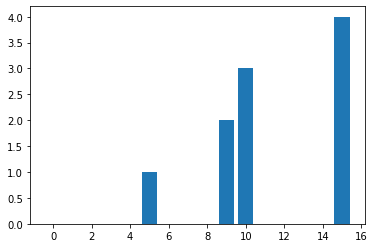

In [116]:
%matplotlib inline

x = [0,5,9,10,15]
y = [0,1,2,3,4]
plt.bar(x,y)
# plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.show()

# Get overall summary of stock for a year graphically

In [349]:
def overalltrade_plot(dataFrame, ticker, p_or_c):

    fig, ax = plt.subplots(2, 2, figsize=(12, 10), sharex='col')

    ax[0,0].plot(dataFrame.loc[:, "Month"], dataFrame.loc[:,"Daily Sum"], 'o-')
    ax[0, 1].plot(dataFrame.loc[:,'Month'], dataFrame.loc[:,"Daily Perc"], 'o-')
    ax[1, 0].plot(dataFrame.loc[:,'Month'], dataFrame.loc[:,"Exp Sum"], 'o-')
    ax[1, 1].plot(dataFrame.loc[:,'Month'], dataFrame.loc[:,"Exp Perc"], 'o-')

    ax[0,0].set_title("Monthly sum of Successful Trades by Exiting Same day", fontsize=12)
    ax[0,0].set(ylabel="Number of Successful Trades")
    ax[0, 1].set_title("Percent of Successful Trades by Exiting Same day", fontsize=12)
    ax[0,1].set(ylabel="Percentage of Successful Trades")
    ax[1, 0].set_title("Sum of Successful Trades by Exiting on Expiraiton Date", fontsize=12)
    ax[1,0].set(ylabel="Number of Successful Trades", xlabel="Month")
    ax[1, 1].set_title("Percent of Successful Trades by Exiting on Expiration Date", fontsize=12)
    ax[1,1].set(ylabel="Number of Successful Trades", xlabel="Month")

    fig.suptitle(ticker + ' Trading Summary for 2018 ' + p_or_c, fontsize=16)
    plt.show()
#     fig.savefig(ticker + "_Summary_2018_" + p_or_c)

# Calculate successes

In [85]:
def calculate_success(srce, ticker, p_or_c, n):
    
#     files = glob.glob(srce)
    
    df_daily, df_exp = success_df(srce, ticker, p_or_c, n)

    res_daily = (df_daily["Success"].sum(), (df_daily["Success"].sum() / df_daily.shape[0]), df_daily["Success"].count())
    res_exp = (df_exp["Success"].sum(), (df_exp["Success"].sum() / df_exp.shape[0]), df_exp["Success"].count())
    
    return res_daily, res_exp

# calculate_success("2018/*.csv", "AAPL", "call", 2)

In [88]:
# tsla_Jan_call_2_daily, tsla_Jan_call_2_exp = calculate_success("2018_1/2018January/*.csv", "TSLA", "call", 2)

files = ['2018_month/2018January/*.csv', '2018_month/2018February/*.csv', '2018_month/2018March/*.csv', 
             '2018_month/2018April/*.csv', '2018_month/2018May/*.csv', '2018_month/2018June/*.csv', 
             '2018_month/2018July/*.csv', '2018_month/2018August/*.csv', '2018_month/2018September/*.csv', 
             '2018_month/2018October/*.csv', '2018_month/2018November/*.csv', '2018_month/2018December/*.csv']


for i in files:
    calculate_success("2018_1/2018February/*.csv", "TSLA", "call", 1)

((5, 0.2631578947368421, 19), (4, 0.21052631578947367, 19))

In [ ]:
# Already finished success lists
tsla_success_list #call
nflx_binom_c
nflx_success_list_c
nflx_success_list_p
nflx_binom_p_day
nflx_binom_p_exp
wynn_success_list_c
wynn_success_list_p
nflx_norm_c_day
nflx_norm_c_exp

In [281]:
nflx_success_list_c.to_csv("nflx_success_list_c")
nflx_success_list_p.to_csv("nflx_success_list_p")
wynn_success_list_c.to_csv("wynn_success_list_c")
wynn_success_list_p.to_csv("wynn_success_list_p")

In [222]:
nflx_success_list_c = calculate_success_lst("WYNN", "call", 1)

In [230]:
nflx_norm_c_day

In [224]:
_success_list_c.sum(), nflx_success_list_p.sum()

(Month          JanFebMarAprMayJunJulAugSepOctNovDec
 Daily Sum                                        76
 Daily Perc                                   3.6241
 Daily Total                                     251
 Exp Sum                                          47
 Exp Perc                                    2.67936
 Exp Total                                       225
 dtype: object, Month          JanFebMarAprMayJunJulAugSepOctNovDec
 Daily Sum                                       160
 Daily Perc                                  7.64318
 Daily Total                                     251
 Exp Sum                                         109
 Exp Perc                                    5.35322
 Exp Total                                       248
 dtype: object)

p-value for following option flow: 0.00


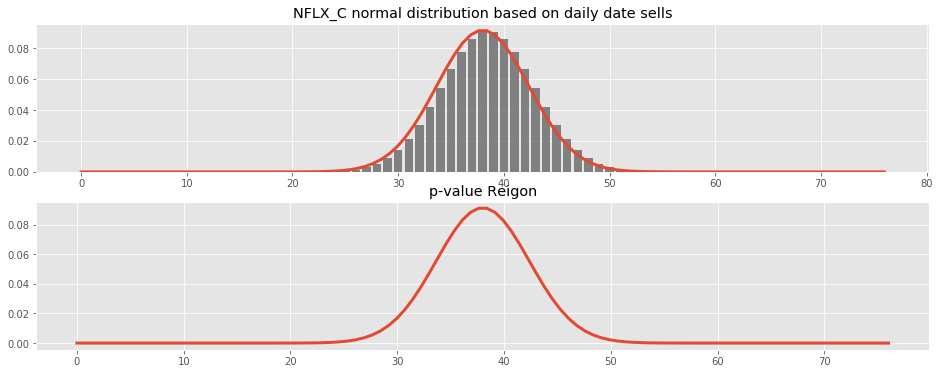

In [297]:
nflx_norm_c_day = normalDistribution("NFLX", "daily", "C", 76, .5, 251)



Probability of Observing Data Equal or More Extreme than Actual: 0.14


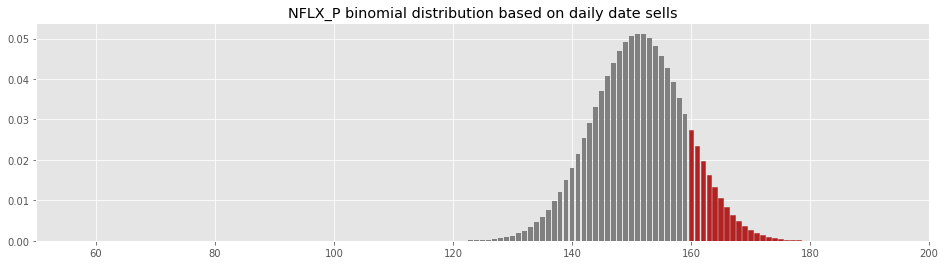

In [296]:
nflx_binom_p_day = binomDistribution("NFLX", "daily", "P", 251, .6, 160)

In [243]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

count = np.array([47, 109])
nobs = np.array([225, 248])
stat, pval = proportions_ztest(count, nobs)
print('{0:0.3f}'.format(pval))



0.000


Difference in sample proportions: 0.23
p-value for Call/Put Success frequency comparison: 0.00


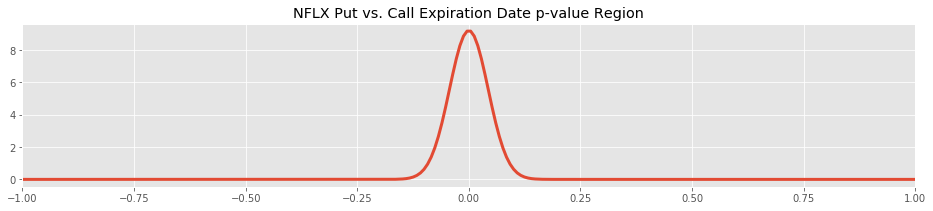

In [245]:
two_prop_ztest(47, 109, 225, 248, "NFLX", "Expiration")

In [244]:
def two_prop_ztest(c1, p2, t1, t2, ticker, date):
    
    shared_sample_freq = (c1 + p2) / (t1 + t2)
    shared_sample_variance = (t1+t2) * (shared_sample_freq * (1 - shared_sample_freq)) / (t1 * t2)

    difference_in_proportions = stats.norm(0, np.sqrt(shared_sample_variance))
    
    call_freq = c1 / t1
    put_freq = p2 / t2
    difference_in_sample_proportions = abs(call_freq - put_freq)
    print("Difference in sample proportions: {:2.2f}".format(difference_in_sample_proportions))
    
    p_value = 1 - difference_in_proportions.cdf(difference_in_sample_proportions)
    print("p-value for Call/Put Success frequency comparison: {:2.2f}".format(p_value))
    
    fig, ax = plt.subplots(1, figsize=(16, 3))

    x = np.linspace(-1, 1, num=250)
    ax.plot(x, difference_in_proportions.pdf(x), linewidth=3)
    ax.fill_between(x, difference_in_proportions.pdf(x), where=(x >= difference_in_sample_proportions),
                    color="red", alpha=0.5)
    ax.set_xlim(-1, 1)
    ax.set_title(ticker + " Put vs. Call " + date + " Date p-value Region")

In [219]:
def normalDistribution(ticker, exp_day, p_or_c, n, p, correct):

    bi_distr = stats.binom(n+1, p)
    binom_mean = p * n
    binom_var = p * n * (1-p)
    normal_approx = stats.norm(binom_mean, np.sqrt(binom_var))
    
    fig, ax = plt.subplots(2, 1, figsize=(16, 6))
    x = np.linspace(0, n, num=100)
    bars = ax[0].bar(range(n+1), [bi_distr.pmf(i) for i in range(n+1)], color = 'grey', align = 'center')
    ax[0].plot(x, normal_approx.pdf(x), linewidth=3)
    ax[0].set_title(ticker + "_" + p_or_c + " normal distribution based on " + exp_day + " date sells")
    p_value = 1 - normal_approx.cdf(correct)
    print("p-value for following option flow: {:2.2f}".format(p_value))
#     print("p-value for following option flow: {:2.2f}".format(p_value)
        
#     fig, ax = plt.subplots(1, figsize=(16, 3))

    ax[1].plot(x, normal_approx.pdf(x), linewidth=3)
#     ax[1].set_xlim(2400, 2600)
    ax[1].fill_between(x, normal_approx.pdf(x), 
                    where=(x >= correct), color="firebrick", alpha=0.5)
    ax[1].set_title("p-value Reigon")
#     print("p-value for following option flow: {:2.2f}".format(p_value))                                                          
                                                
    
#     bars = ax.bar(range(n+1), [bi_distr.pmf(i) for i in range(n+1)], align = "center", color="grey")
#     ax.set_xlim(50, 200)
#     ax.set_title(ticker + "_" + p_or_c + " binomial distribution based on " + exp_day + " date sells")
#     for i in range(correct, n+1):
#         bars[i].set_color('firebrick')
        
#     prob_equal_or_more_extreme = 1 - bi_distr.cdf(correct - 1)
#     print("Probability of Observing Data Equal or More Extreme than Actual: {:2.2}".format(
#     prob_equal_or_more_extreme))
    

def binomDistribution(ticker, exp_day, p_or_c, n, p, correct):

    bi_distr = stats.binom(n+1, p)

    fig, ax = plt.subplots(1, figsize=(16, 4))
    bars = ax.bar(range(n+1), [bi_distr.pmf(i) for i in range(n+1)], align = "center", color="grey")
    ax.set_xlim(50, 200)
    ax.set_title(ticker + "_" + p_or_c + " binomial distribution based on " + exp_day + " date sells")
    for i in range(correct, n+1):
        bars[i].set_color('firebrick')
        
    prob_equal_or_more_extreme = 1 - bi_distr.cdf(correct - 1)
    print("Probability of Observing Data Equal or More Extreme than Actual: {:2.2}".format(
    prob_equal_or_more_extreme))


In [129]:
tsla_bi_distr = stats.binom(n=250, p=.5)

# CDF gives P(draw <= value)
prob_equal_or_more_extreme = 1 - tsla_bi_distr.cdf(110)
print("Probability of Observing Data Equal or More Extreme than Actual: {:2.2}".format(
    prob_equal_or_more_extreme))

Probability of Observing Data Equal or More Extreme than Actual: 0.97


In [312]:
stock_2018_c.shape

(156, 7)

In [317]:
randoms = np.random.randint(2, size=156)

In [318]:
randoms.sum()/156

0.5256410256410257

# U-Test

In [283]:
stock_call_lst = [jpm_2018_succ_c, ba_2018_succ_c, baba_2018_succ_c, amd_2018_succ_c, wynn_success_list_c, 
                  fb_2018_succ_c, shop_2018_succ_c, dis_2018_succ_c, hd_2018_succ_c, amzn_2018_succ_c,
                  googl_2018_succ_c, nflx_success_list_c, tsla_2018_succ_c]

In [285]:
stock_put_lst = [jpm_2018_succ_p, ba_2018_succ_p, baba_2018_succ_p, amd_2018_succ_p, wynn_success_list_p, 
                  fb_2018_succ_p, shop_2018_succ_p, dis_2018_succ_p, hd_2018_succ_p, amzn_2018_succ_p,
                  googl_2018_succ_p, nflx_success_list_p, tsla_2018_succ_p]

In [286]:
stock_2018_c = pd.concat(stock_call_lst)
stock_2018_p = pd.concat(stock_put_lst)

In [331]:
stock_2018_c["Exp Perc"].mean()
print("Average percentage of success from all 2018 Calls: {}".format(stock_2018_c["Exp Perc"].mean()))

Average percentage of success from all 2018 Calls: 0.30875822646029316


In [333]:
stock_2018_p["Exp Perc"].mean()
print("Average percentage of success from all 2018 Puts sold at expiration date: {}".format(stock_2018_p["Exp Perc"].mean()))

Average percentage of success from all 2018 Puts sold at expiration date: 0.3057389733931831


In [334]:
stock_2018_p["Daily Perc"].mean()
print("Average percentage of success from all 2018 Puts sold same day: {}".format(stock_2018_p["Daily Perc"].mean()))

Average percentage of success from all 2018 Puts sold same day: 0.44452772627829845


In [335]:
stock_2018_c["Daily Perc"].mean()
print("Average percentage of success from all 2018 Calls sold same day: {}".format(stock_2018_c["Daily Perc"].mean()))

Average percentage of success from all 2018 Calls sold same day: 0.4117677707494642


In [320]:
res_exp = stats.mannwhitneyu(stock_2018_c["Exp Perc"], stock_2018_p["Exp Perc"], alternative = "greater")

res_daily = stats.mannwhitneyu(stock_2018_c["Daily Perc"], stock_2018_p["Daily Perc"], alternative = "less")

In [321]:
print(res_exp)

print("\nThe Mann Whitney U test tells us that for selling upon expiration date is better for calls than puts")

MannwhitneyuResult(statistic=12538.0, pvalue=0.3213358763378379)

The Mann Whitney U test tells us that for selling upon expiration date is better for calls than puts


In [322]:
print(res_daily)

print("\nTells us that buying puts and selling on a daily basis throughout the year is better than buying calls.")

MannwhitneyuResult(statistic=10853.5, pvalue=0.04943900430318442)

Tells us that buying puts and selling on a daily basis throughout the year is better than buying calls.


# Implement MACD as a filter

In [336]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import pyEX as p
ticker = 'AMD'
timeframe = '6m'
df = p.chartDF(ticker, timeframe)
df = df[['close']]
df.reset_index(level=0, inplace=True)
df.columns=['ds','y']
plt.plot(df.ds, df.y, label='AMD')
plt.show()

ModuleNotFoundError: No module named 'pyEX'

In [337]:
exp1 = df.y.ewm(span=12, adjust=False).mean()
exp2 = df.y.ewm(span=26, adjust=False).mean()
macd = exp1-exp2
exp3 = macd.ewm(span=9, adjust=False).mean()
plt.plot(df.ds, macd, label='AMD MACD', color = '#EBD2BE')
plt.plot(df.ds, exp3, label='Signal Line', color='#E5A4CB')
plt.legend(loc='upper left')
plt.show()

NameError: name 'df' is not defined

In [398]:
# If signal is above macd then bearish, macd above signal then bullish

import talib

df_nflx_macd = basic_chart_macd("Basic_Charts/NFLX.csv")

macd2 = np.vstack( talib.MACD( df_nflx_macd["Close"], 12, 26, 9 ) )

macd2 = pd.DataFrame( macd2.T,
                      columns = ['macd','macdsignal','macdhist']
                      )
macd2["Date Time"] = df_nflx_macd["Date Time"]
macd2 = macd2[(macd2["Date Time"] >= "2018-01-02") & (macd2["Date Time"] <= "2018-12-31")]
macd2 = macd2.reset_index().drop(columns="index")
# macd2 = macd2.drop(["index"])
# macd2 = df_nflx.join( macd2 )
macd2

macd  macdsignal  macdhist  Date Time
0     0.106326   -1.295869  1.402195 2018-01-02
1     1.194814   -0.797732  1.992546 2018-01-03
2     2.080269   -0.222132  2.302401 2018-01-04
3     3.098101    0.441914  2.656186 2018-01-05
4     4.024572    1.158446  2.866126 2018-01-08
..         ...         ...       ...        ...
246 -11.690451   -9.854814 -1.835637 2018-12-24
247 -11.423576  -10.168566 -1.255010 2018-12-26
248 -10.933135  -10.321480 -0.611655 2018-12-27
249 -10.383209  -10.333826 -0.049383 2018-12-28
250  -8.910268  -10.049114  1.138846 2018-12-31

[251 rows x 4 columns]

In [399]:
df_2018_nflx = df_2018[df2018["Symbol"] == "NFLX"]

NameError: name 'df_2018' is not defined

In [358]:
nflx_close = df_nflx["Close"].to_numpy()

df_nflx

0    Date Time    Open    High     Low    Close  Change    Volume
0   2018-01-02  196.10  201.65  195.42  201.070   9.110  10966800
1   2018-01-03  202.05  206.21  201.50  205.050   3.980   8591300
2   2018-01-04  206.20  207.05  204.00  205.630   0.580   6029600
3   2018-01-05  207.25  210.02  205.59  209.990   4.360   7033200
4   2018-01-08  210.02  212.50  208.44  212.050   2.060   5580100
..         ...     ...     ...     ...      ...     ...       ...
246 2018-12-24  242.00  250.65  233.68  233.880 -12.510   9547600
247 2018-12-26  233.92  254.50  231.23  253.670  19.790  14402700
248 2018-12-27  250.11  255.59  240.10  255.565   1.895  12235200
249 2018-12-28  257.94  261.91  249.80  256.080   0.515  10987200
250 2018-12-31  260.16  270.10  260.00  267.660  11.580  13508900

[251 rows x 7 columns]

# Percentage and summed success plots

In [246]:
tsla_2018_succ_c = calculate_success_lst("TSLA", "call", 1)
tsla_2018_succ_p = calculate_success_lst("TSLA", "put", 1)

In [280]:
tsla_2018_succ_c.to_csv("tsla_2018_succ_c")
tsla_2018_succ_p.to_csv("tsla_2018_succ_p")

In [251]:
tsla_2018_succ_c

Month  Daily Sum  Daily Perc  Daily Total  Exp Sum  Exp Perc  Exp Total
0    Jan         12    0.571429           21       12  0.571429         21
1    Feb          5    0.263158           19        4  0.210526         19
2    Mar         11    0.523810           21        7  0.333333         21
3    Apr         11    0.523810           21        8  0.380952         21
4    May          7    0.318182           22        6  0.272727         22
5    Jun         12    0.571429           21       10  0.476190         21
6    Jul          8    0.380952           21        5  0.238095         21
7    Aug          8    0.347826           23        8  0.347826         23
8    Sep         12    0.631579           19        8  0.421053         19
9    Oct         11    0.478261           23        6  0.260870         23
10   Nov          6    0.285714           21       12  0.571429         21
11   Dec          8    0.421053           19        8  0.470588         17

In [252]:
tsla_2018_succ_p

Month  Daily Sum  Daily Perc  Daily Total  Exp Sum  Exp Perc  Exp Total
0    Jan         15    0.714286           21        9  0.450000         20
1    Feb         13    0.684211           19        8  0.421053         19
2    Mar          9    0.428571           21       11  0.523810         21
3    Apr         16    0.761905           21       11  0.578947         19
4    May         10    0.454545           22        8  0.363636         22
5    Jun         17    0.809524           21        8  0.380952         21
6    Jul          7    0.333333           21        6  0.315789         19
7    Aug         12    0.521739           23        8  0.363636         22
8    Sep         11    0.578947           19        4  0.210526         19
9    Oct         10    0.434783           23        4  0.190476         21
10   Nov          8    0.380952           21        3  0.150000         20
11   Dec          4    0.210526           19        4  0.285714         14

<IPython.core.display.Javascript object>


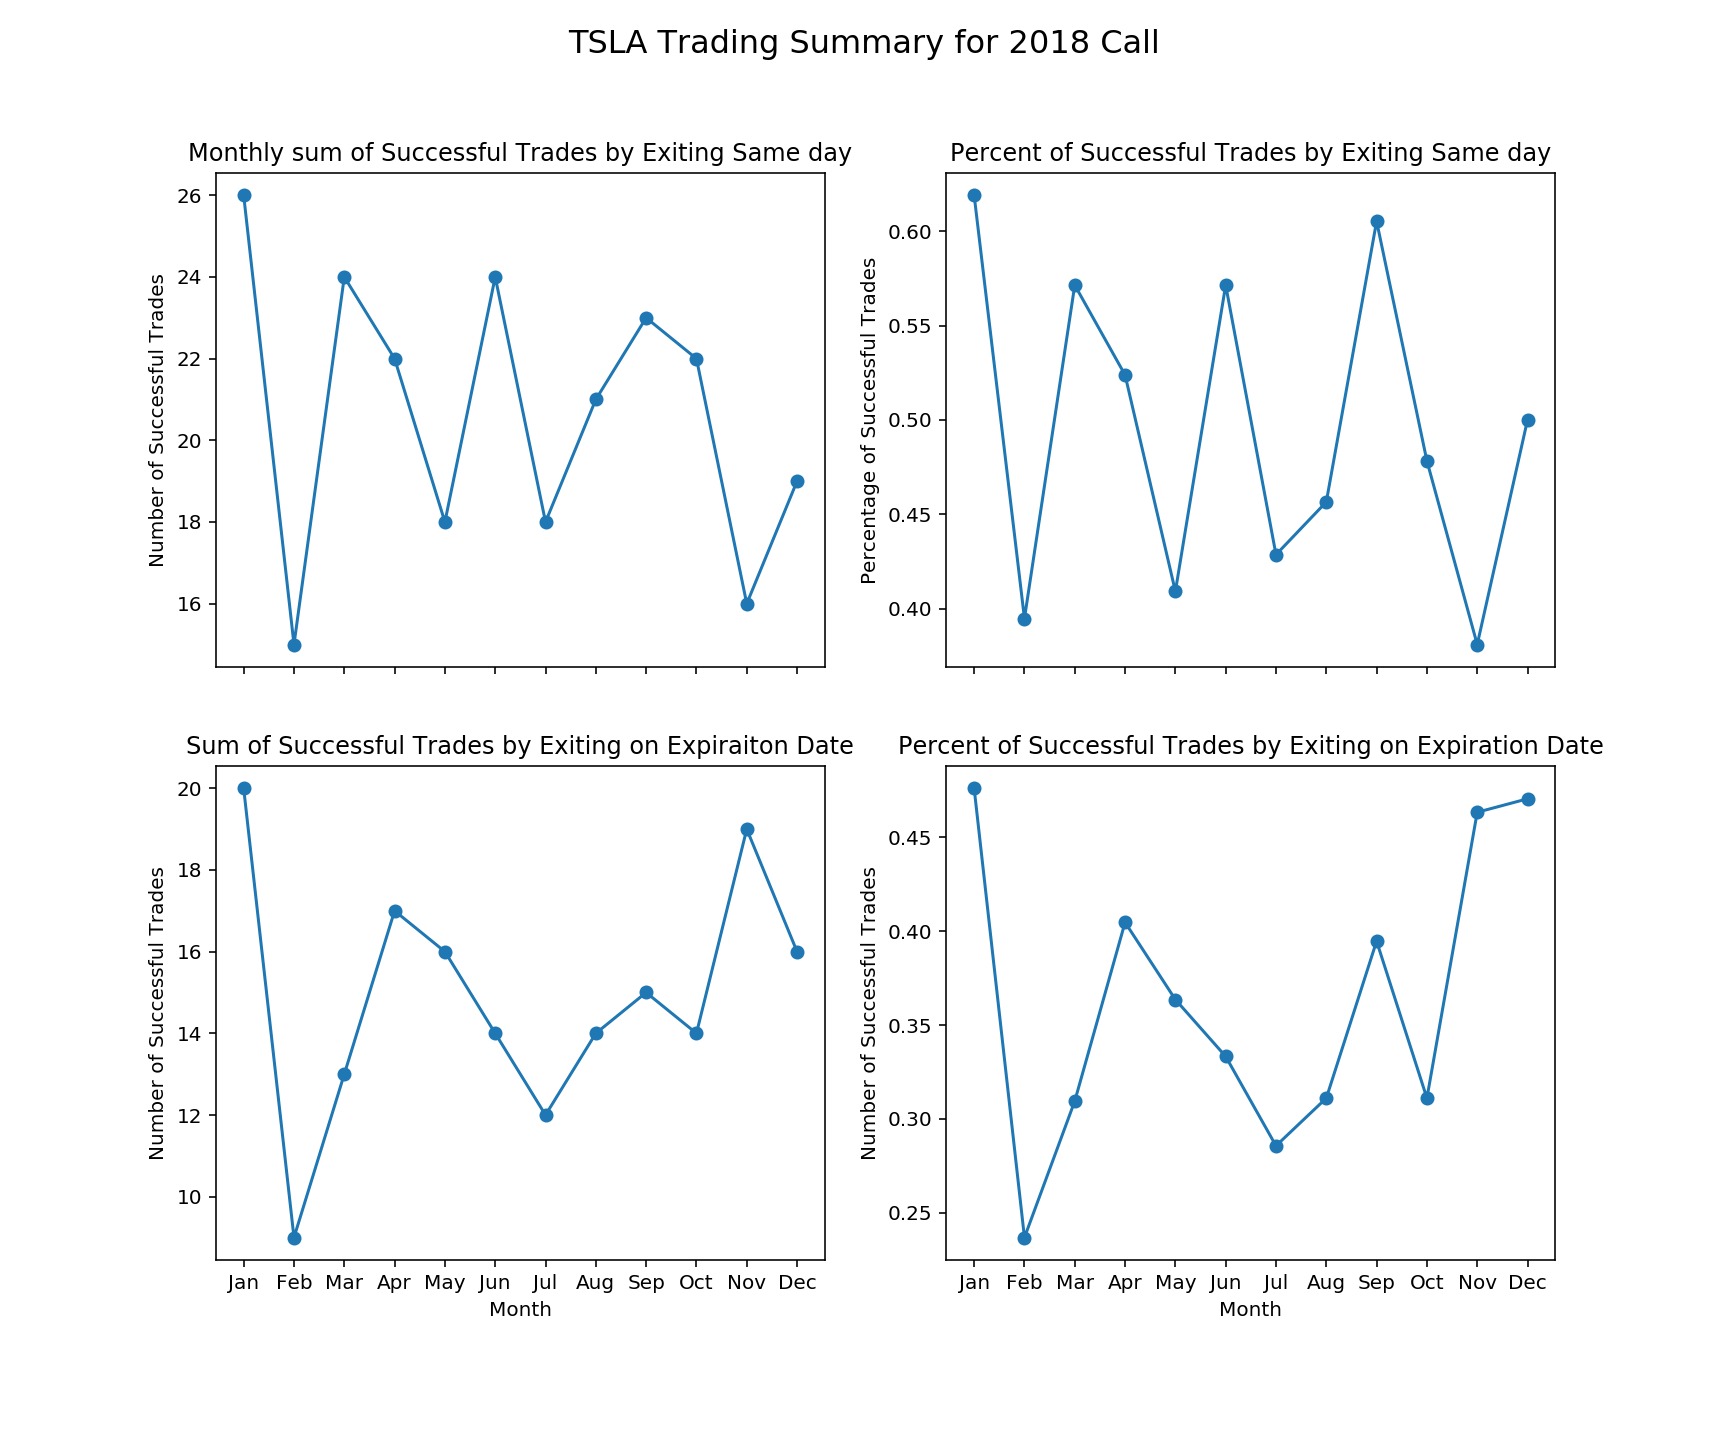

In [63]:
overalltrade_plot(tsla_2018_succ_c, "TSLA", "Call")

In [247]:
nflx_2018_succ_c = calculate_success_lst("NFLX", "call", 1)
nflx_2018_succ_p = calculate_success_lst("NFLX", "put", 1)

KeyboardInterrupt: 

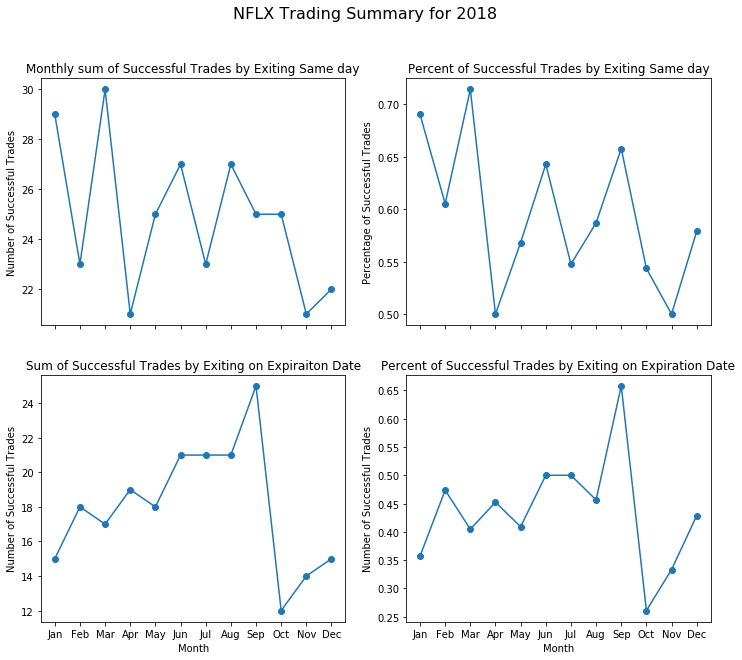

In [171]:
overalltrade_plot(nflx_2018_succ_c, "NFLX")

In [204]:
nflx_2018_succ_c = calculate_success_lst("NFLX", "put", 2)

In [ ]:
overalltrade_plot(nflx_2018_succ_c, "NFLX", "Puts")

In [200]:
# Trying out a distribution

import scipy.stats as stats
import statistics as stat

mu = stat.mean(nflx_2018_succ_c.loc[:, "Exp Perc"])
std = stat.stdev(nflx_2018_succ_c.loc[:, "Exp Perc"])

mu, std

(0.4361876364164694, 0.09941789344263177)

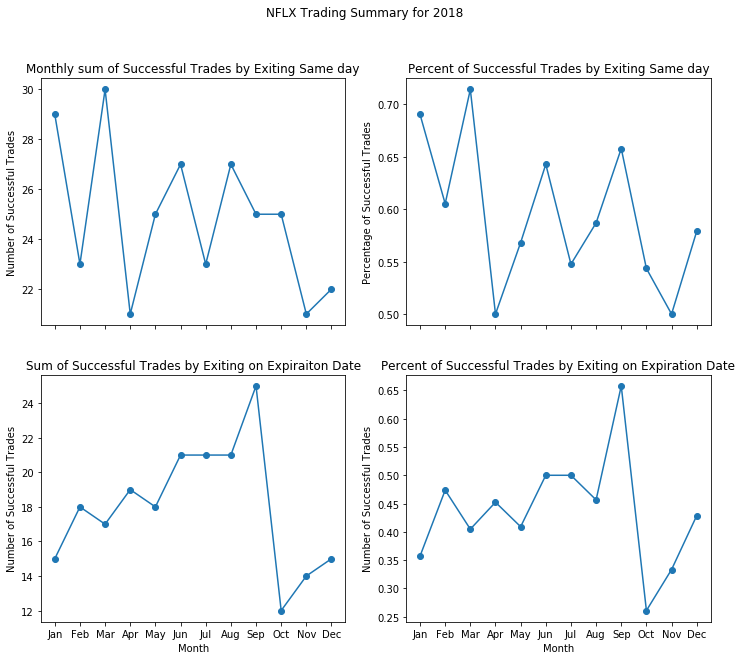

In [153]:
overalltrade_plot(nflx_2018_succ_c_top, "NFLX")

In [248]:
googl_2018_succ_c = calculate_success_lst("GOOGL", "call", 1)
googl_2018_succ_p = calculate_success_lst("GOOGL", "put", 1)



In [279]:
googl_2018_succ_c.to_csv("googl_2018_succ_c")
googl_2018_succ_p.to_csv("googl_2018_succ_p")

In [257]:
googl_2018_succ_p

Month  Daily Sum  Daily Perc  Daily Total  Exp Sum  Exp Perc  Exp Total
0    Jan         14    0.666667           21        8  0.380952         21
1    Feb          9    0.473684           19        3  0.157895         19
2    Mar          8    0.380952           21        6  0.285714         21
3    Apr         11    0.523810           21        4  0.190476         21
4    May         11    0.500000           22        4  0.181818         22
5    Jun         12    0.571429           21        6  0.285714         21
6    Jul         10    0.476190           21        9  0.428571         21
7    Aug         15    0.652174           23       10  0.434783         23
8    Sep         10    0.526316           19        8  0.421053         19
9    Oct          5    0.217391           23        4  0.190476         21
10   Nov          9    0.428571           21        8  0.444444         18
11   Dec          8    0.421053           19        7  0.466667         15

In [258]:
googl_2018_succ_c

Month  Daily Sum  Daily Perc  Daily Total  Exp Sum  Exp Perc  Exp Total
0    Jan         12    0.571429           21       10  0.476190         21
1    Feb          7    0.368421           19        5  0.263158         19
2    Mar         13    0.619048           21        6  0.285714         21
3    Apr          9    0.428571           21        9  0.428571         21
4    May          8    0.363636           22        5  0.227273         22
5    Jun         10    0.476190           21        5  0.238095         21
6    Jul         11    0.523810           21       11  0.523810         21
7    Aug          8    0.347826           23        8  0.347826         23
8    Sep          5    0.263158           19        8  0.421053         19
9    Oct         12    0.521739           23        8  0.380952         21
10   Nov          8    0.380952           21        6  0.285714         21
11   Dec          6    0.315789           19        4  0.250000         16

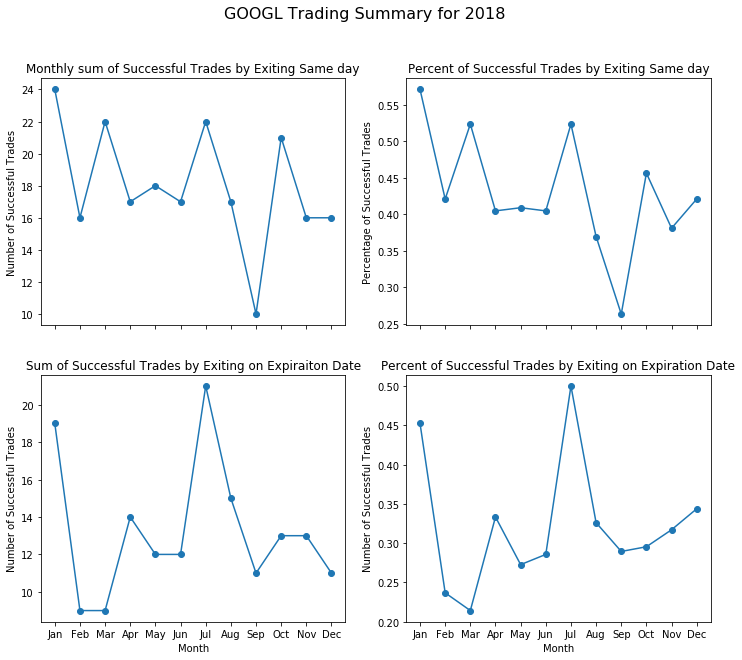

In [172]:
overalltrade_plot(googl_2018_succ_c, "GOOGL")

In [259]:
amzn_2018_succ_c = calculate_success_lst("AMZN", "call", 1)
amzn_2018_succ_p = calculate_success_lst("AMZN", "put", 1)


In [278]:
amzn_2018_succ_c.to_csv("amzn_2018_succ_c")
amzn_2018_succ_p.to_csv("amzn_2018_succ_p")

In [254]:
amzn_2018_succ_c

Month  Daily Sum  Daily Perc  Daily Total  Exp Sum  Exp Perc  Exp Total
0    Jan         11    0.523810           21        4  0.190476         21
1    Feb         12    0.631579           19        9  0.473684         19
2    Mar         15    0.714286           21       10  0.476190         21
3    Apr         10    0.476190           21        7  0.350000         20
4    May         15    0.681818           22        8  0.363636         22
5    Jun         13    0.619048           21        8  0.380952         21
6    Jul          9    0.428571           21        4  0.190476         21
7    Aug         11    0.478261           23        3  0.130435         23
8    Sep         10    0.526316           19        7  0.368421         19
9    Oct         13    0.565217           23        7  0.304348         23
10   Nov          9    0.428571           21        6  0.285714         21
11   Dec          8    0.421053           19       10  0.555556         18

In [255]:
amzn_2018_succ_p

NameError: name 'amzn_2018_succ_p' is not defined

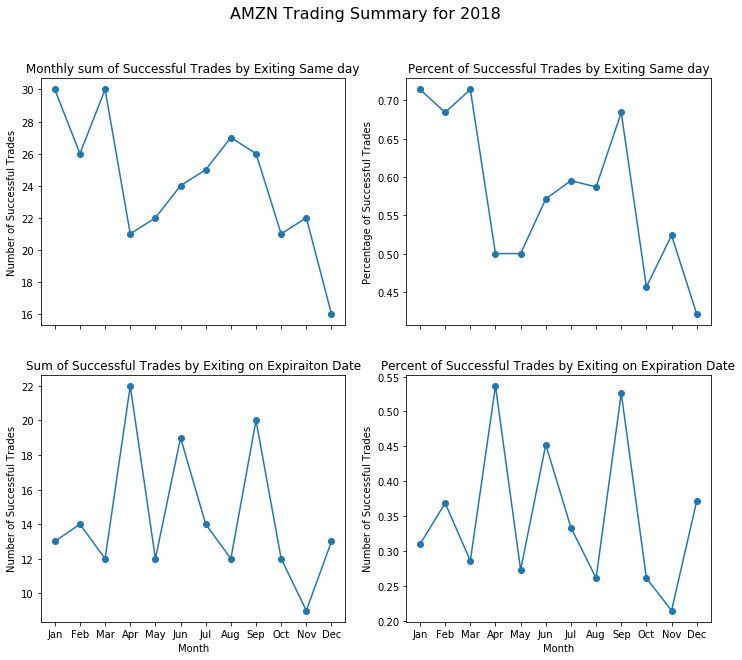

In [173]:
overalltrade_plot(amzn_2018_succ_c, "AMZN")

In [260]:
hd_2018_succ_c = calculate_success_lst("HD", "call", 1)
hd_2018_succ_p = calculate_success_lst("HD", "put", 1)

In [277]:
hd_2018_succ_c.to_csv("hd_2018_succ_c")
hd_2018_succ_p.to_csv("hd_2018_succ_p")

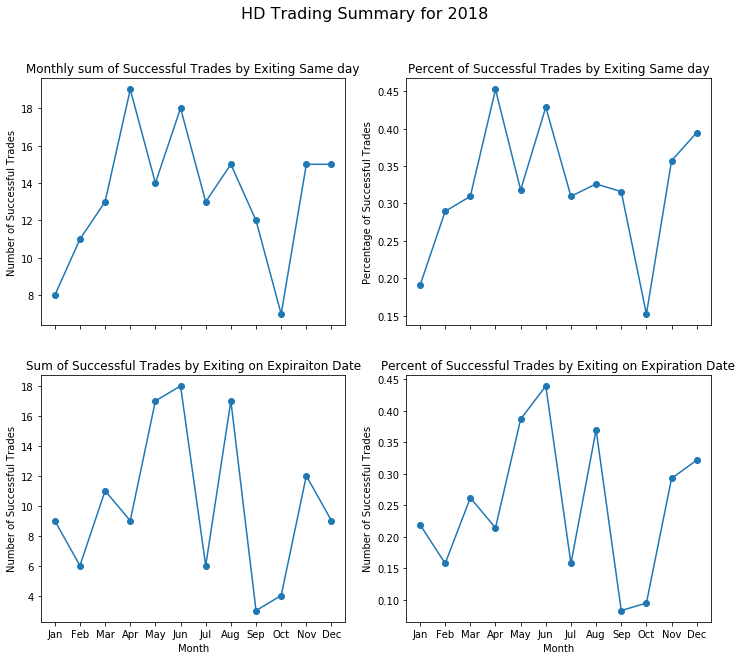

In [174]:
overalltrade_plot(hd_2018_succ_c, "HD")

In [261]:
dis_2018_succ_c = calculate_success_lst("DIS", "call", 1)
dis_2018_succ_p = calculate_success_lst("DIS", "put", 1)

In [276]:
dis_2018_succ_c.to_csv("dis_2018_succ_c")
dis_2018_succ_p.to_csv("dis_2018_succ_p")

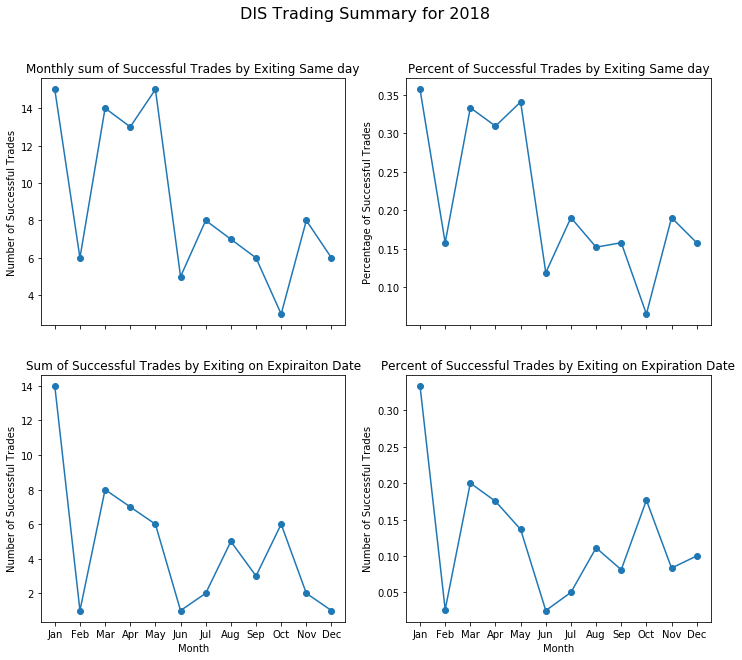

In [175]:
overalltrade_plot(dis_2018_succ_c, "DIS")

In [262]:
shop_2018_succ_c = calculate_success_lst("SHOP", "call", 1)
shop_2018_succ_p = calculate_success_lst("SHOP", "put", 1)

In [275]:
shop_2018_succ_c.to_csv("shop_2018_succ_c")
shop_2018_succ_p.to_csv("shop_2018_succ_p")

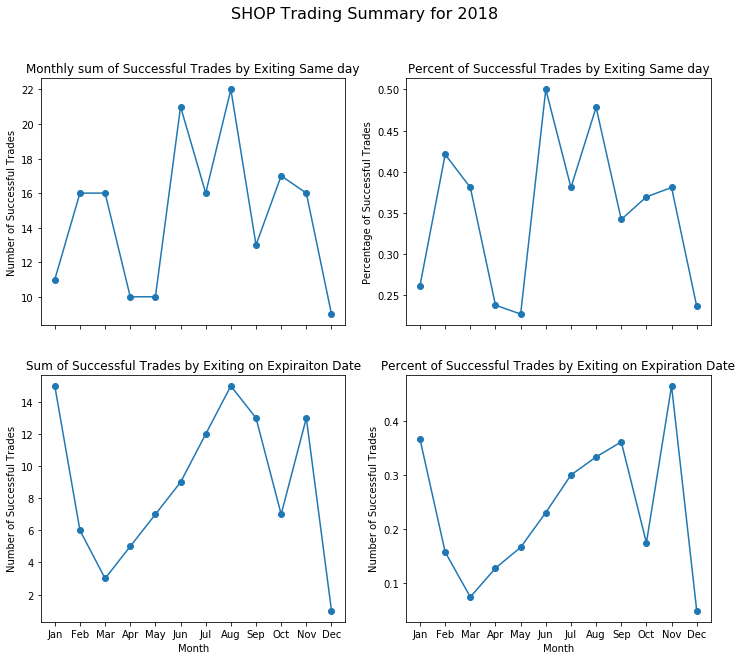

In [176]:
overalltrade_plot(shop_2018_succ_c, "SHOP")

In [263]:
# Might be good for puts

fb_2018_succ_c = calculate_success_lst("FB", "call", 1)
fb_2018_succ_p = calculate_success_lst("FB", "put", 1)

In [274]:
fb_2018_succ_c.to_csv("fb_2018_succ_c")
fb_2018_succ_p.to_csv("fb_2018_succ_p")

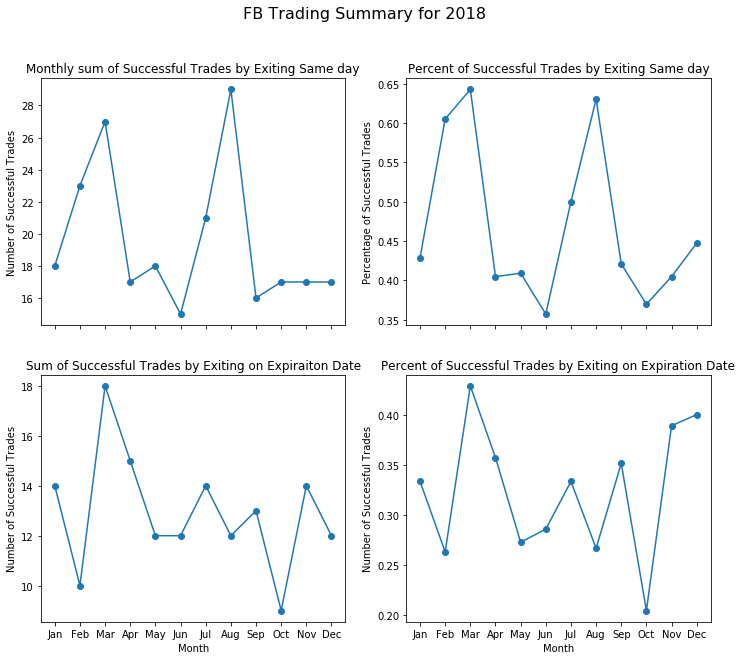

In [177]:
overalltrade_plot(fb_2018_succ_c, "FB")

In [165]:
# Might be good for puts

wynn_2018_succ_c = calculate_success_lst("WYNN", "call", 2)
# wynn_2018_succ_c_top = calculate_success_lst("WYNN", "call", 1)

In [184]:
wynn_2018_succ_p = calculate_success_lst("WYNN", "put", 2)

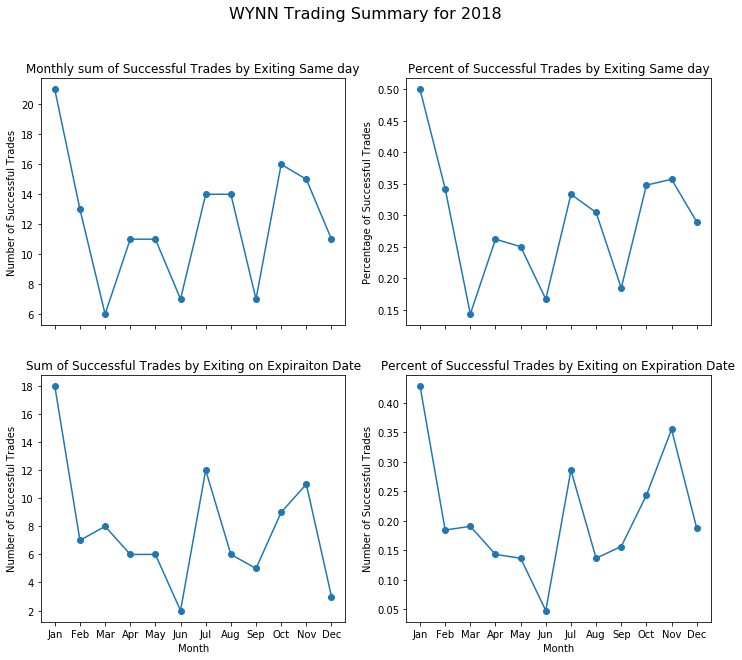

In [178]:
overalltrade_plot(wynn_2018_succ_c, "WYNN", "Calls")

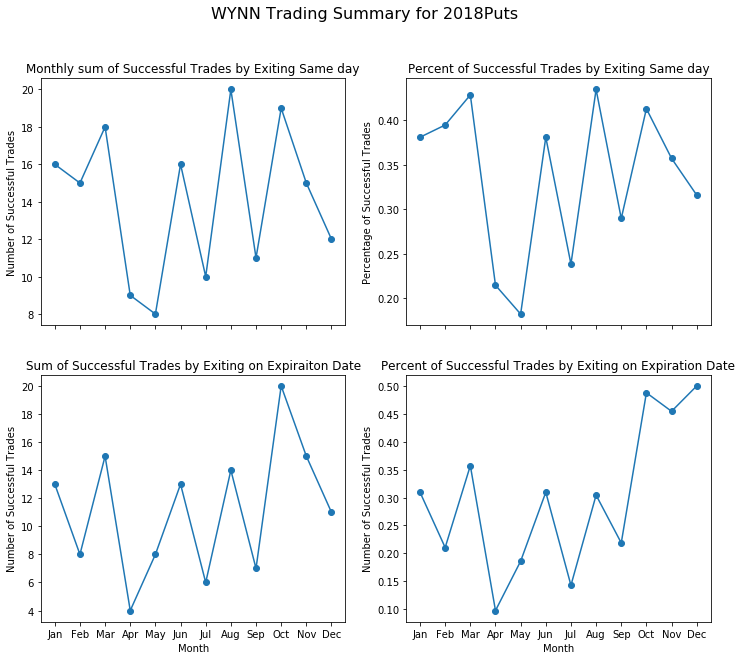

In [185]:
overalltrade_plot(wynn_2018_succ_p, "WYNN", "Puts")

In [186]:
wynn_2018_succ_p

Month  Daily Sum  Daily Perc  Exp Sum  Exp Perc
0    Jan         16    0.380952       13  0.309524
1    Feb         15    0.394737        8  0.210526
2    Mar         18    0.428571       15  0.357143
3    Apr          9    0.214286        4  0.097561
4    May          8    0.181818        8  0.186047
5    Jun         16    0.380952       13  0.309524
6    Jul         10    0.238095        6  0.142857
7    Aug         20    0.434783       14  0.304348
8    Sep         11    0.289474        7  0.218750
9    Oct         19    0.413043       20  0.487805
10   Nov         15    0.357143       15  0.454545
11   Dec         12    0.315789       11  0.500000

In [264]:
# Might be good for puts

amd_2018_succ_c = calculate_success_lst("AMD", "call", 1)
amd_2018_succ_p = calculate_success_lst("AMD", "put", 1)

In [273]:
amd_2018_succ_c.to_csv("amd_2018_succ_c")
amd_2018_succ_p.to_csv("amd_2018_succ_p")

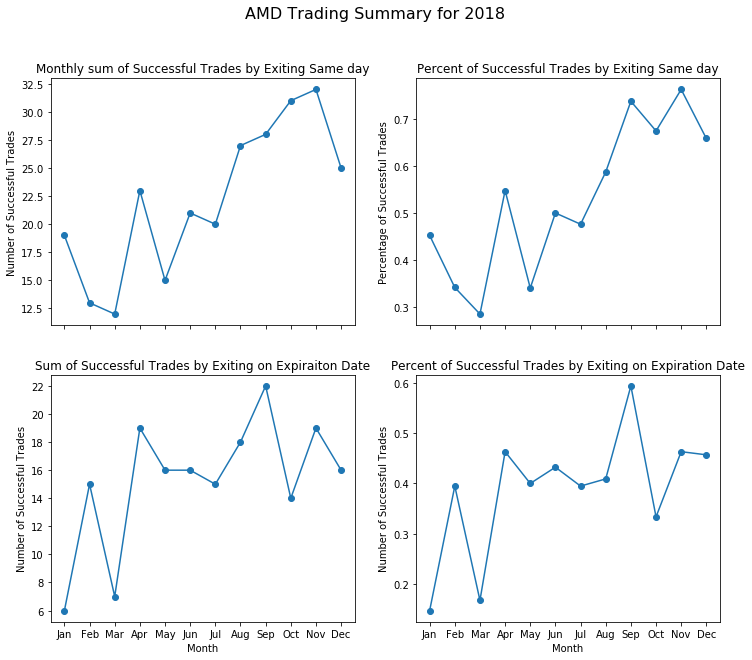

In [179]:
overalltrade_plot(amd_2018_succ_c, "AMD")

In [265]:
baba_2018_succ_c = calculate_success_lst("BABA", "call", 1)
baba_2018_succ_p = calculate_success_lst("BABA", "put", 1)

In [272]:
baba_2018_succ_c.to_csv("baba_2018_succ_c")
baba_2018_succ_p.to_csv("baba_2018_succ_p")

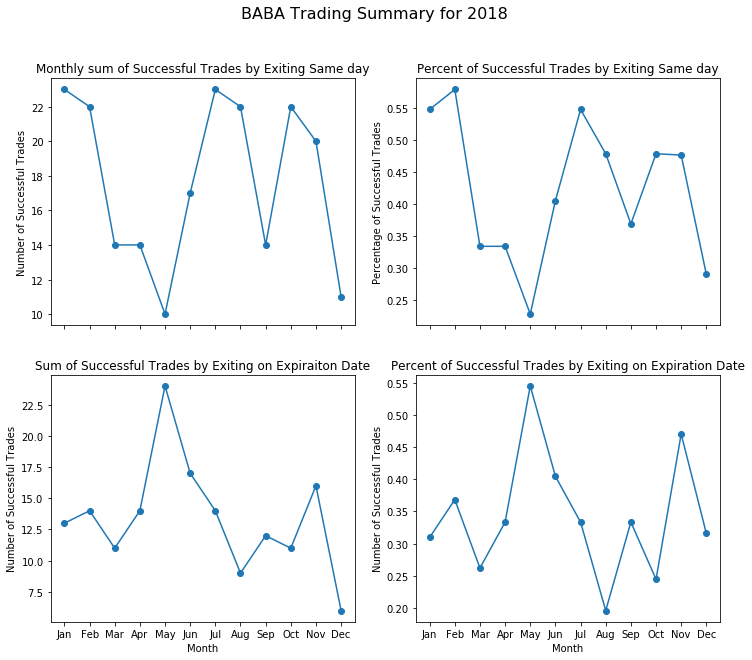

In [180]:
overalltrade_plot(baba_2018_succ_c, "BABA")

In [266]:
ba_2018_succ_c = calculate_success_lst("BA", "call", 1)
ba_2018_succ_p = calculate_success_lst("BA", "put", 1)

In [271]:
ba_2018_succ_c.to_csv("ba_2018_succ_c")
ba_2018_succ_p.to_csv("ba_2018_succ_p")

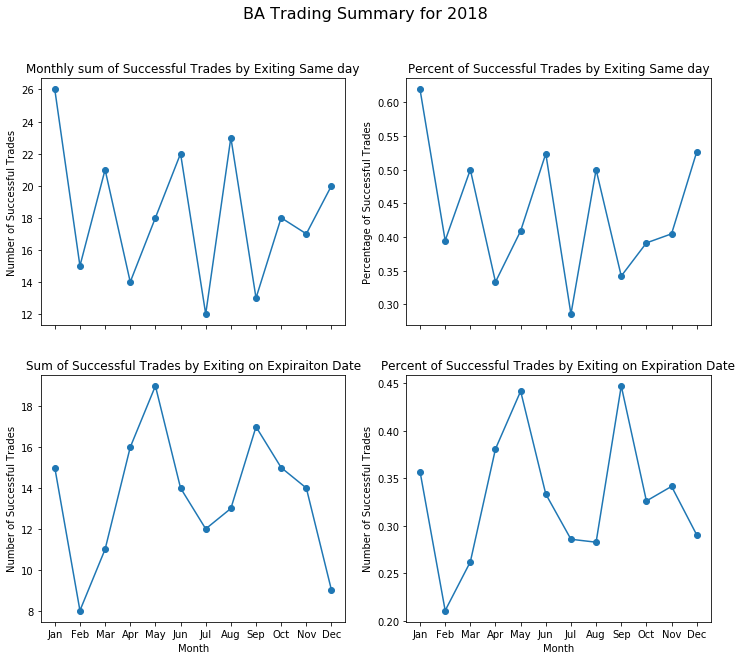

In [181]:
overalltrade_plot(ba_2018_succ_c, "BA")

In [267]:
jpm_2018_succ_c = calculate_success_lst("JPM", "call", 1)
jpm_2018_succ_p = calculate_success_lst("JPM", "put", 1)

In [270]:
jpm_2018_succ_c.to_csv("jpm_2018_succ_c")
jpm_2018_succ_p.to_csv("jpm_2018_succ_p")

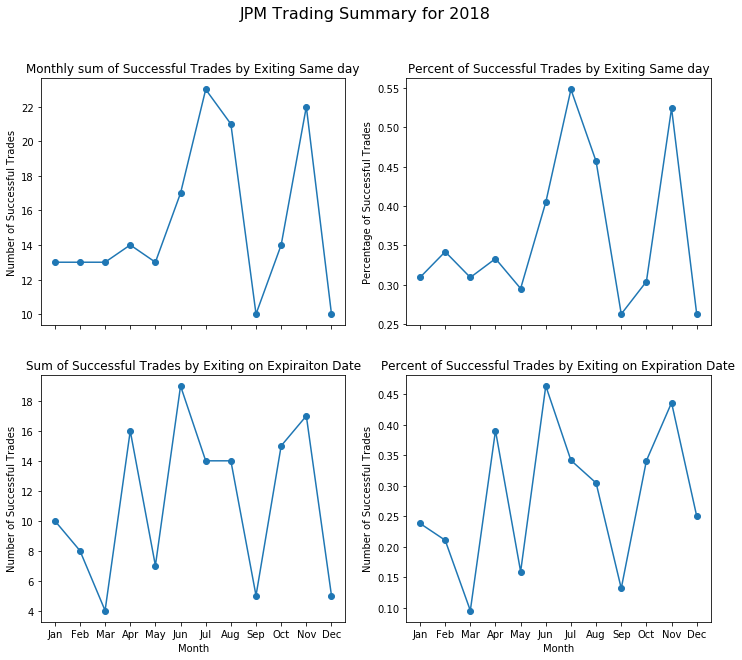

In [182]:
overalltrade_plot(jpm_2018_succ_c, "JPM")

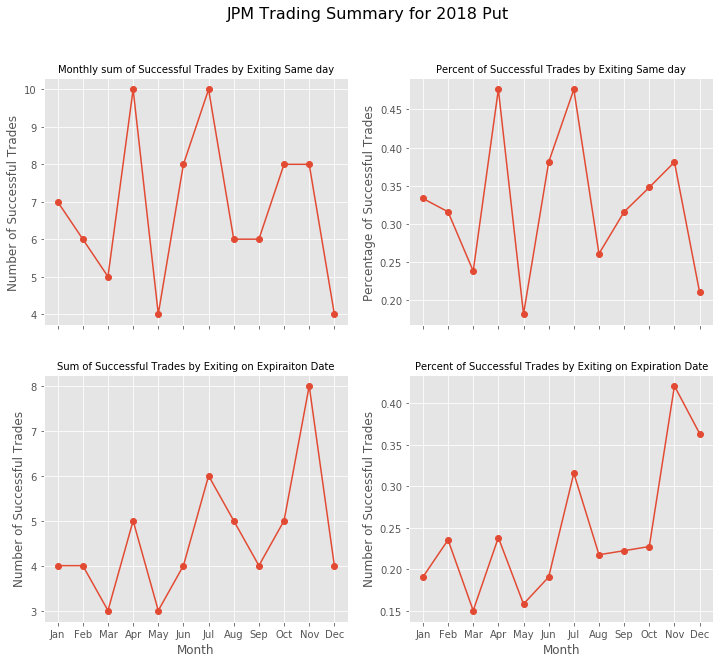

In [348]:
overalltrade_plot(jpm_2018_succ_p, "JPM", "Put")

In [44]:
tsla_succ_daily, tsla_succ_exp = success_df("2018/*.csv", "TSLA", "call", 2)

# tsla_succ_Jan_daily["Success"].sum(), tsla_succ_Jan_daily["Success"].sum() / tsla_succ_Jan_daily.shape[0]

tsla_succ_Jan_daily

tsla_succ_daily.loc[:, "Exp Date"] = pd.to_datetime(tsla_succ_daily.loc[:, "Exp Date"])
tsla_succ_daily.loc[:, "Data Date"] = pd.to_datetime(tsla_succ_daily.loc[:, "Data Date"])

In [52]:
# weeks = [g for n, g in df_tsla.groupby(pd.Grouper(key='Time',freq='W'))]
# weeks

months = [g for n, g in tsla_succ_daily.groupby(pd.Grouper(key='Data Date',freq='M'))]
months

Data Date   Exp Date  Strike Price  Volume    High      Low  Success
0   2018-01-02 2018-01-05         330.0    2353  322.11  311.000        0
1   2018-01-02 2018-01-05         320.0    2334  322.11  311.000        1
2   2018-01-03 2018-01-05         320.0    3069  325.25  315.550        1
3   2018-01-03 2018-01-05         325.0    3007  325.25  315.550        1
4   2018-01-04 2018-01-05         320.0   20990  318.55  305.680        0
5   2018-01-04 2018-01-05         315.0   13345  318.55  305.680        1
6   2018-01-05 2018-01-05         315.0   19227  317.24  312.000        1
7   2018-01-05 2018-01-05         317.5   10688  317.24  312.000        0
8   2018-01-08 2018-01-12         330.0   13851  337.02  315.500        1
9   2018-01-08 2018-01-12         340.0   11804  337.02  315.500        0
10  2018-01-09 2018-01-12         340.0   10223  338.80  327.405        0
11  2018-01-09 2018-01-12         335.0    9338  338.80  327.405        1
13  2018-01-10 2018-01-12         335.0    6662  337.00  330.000        1
12  2018-01-10 2018-01-12         340.0    7257  337.00  330.000        0
14  2018-01-11 2018-01-12         340.0   16504  344.81  333.260        1
15  2018-01-11 2018-01-12         345.0   13410  344.81  333.260        0
16  2018-01-12 2018-01-12         337.5   18130  340.41  333.670        1
17  2018-01-12 2018-01-12         340.0   15720  340.41  333.670        1
18  2018-01-16 2018-01-19         345.0    9988  345.00  334.800        1
19  2018-01-16 2018-01-19         340.0    9778  345.00  334.800        1
20  2018-01-17 2018-01-19         350.0   14549  349.00  339.750        0
21  2018-01-17 2018-01-19         345.0    9004  349.00  339.750        1
22  2018-01-18 2018-01-19         350.0   14499  352.30  343.740        1
23  2018-01-18 2018-01-19         355.0   10571  352.30  343.740        0
24  2018-01-19 2018-01-19         350.0   25403  350.59  342.600        1
25  2018-01-19 2018-01-19         347.5   12945  350.59  342.600        1
26  2018-01-22 2018-01-26         355.0    7030  357.83  349.200        1
27  2018-01-22 2018-01-26         360.0    6692  357.83  349.200        0
29  2018-01-23 2018-01-26         355.0    7323  360.50  351.000        1
28  2018-01-23 2018-01-26         360.0    8057  360.50  351.000        1
30  2018-01-24 2018-01-26         355.0    8759  354.75  343.520        0
31  2018-01-24 2018-01-26         350.0    7925  354.75  343.520        1
32  2018-01-25 2018-01-26         350.0   11631  349.20  336.400        0
33  2018-01-25 2018-01-26         345.0    8678  349.20  336.400        1
34  2018-01-26 2018-01-26         342.5   13752  344.00  335.710        1
35  2018-01-26 2018-01-26         340.0   13011  344.00  335.710        1

In [7]:
calculate_success("2018_1/2018March/*.csv", "GOOGL", "call", 2)

((22, 0.5238095238095238), (9, 0.21428571428571427))

In [139]:
tsla_succ_2018_daily, tsla_succ_2018_exp = success_df("2018/*.csv", "TSLA", "call", 2)

tsla_succ_2018_daily["Success"].sum(), tsla_succ_2018_daily["Success"].sum() / tsla_succ_2018_daily.shape[0]

(248, 0.4940239043824701)

In [33]:
tsla_succ_Jan_daily

Data Date    Exp Date  Strike Price  Volume    High     Low  Success
0   2018-01-02  2018-01-05         330.0    2353  322.11  311.00        0
1   2018-01-02  2018-01-05         320.0    2334  322.11  311.00        1
2   2018-01-02  2018-01-05         340.0    1755  322.11  311.00        0
3   2018-01-03  2018-01-05         320.0    3069  325.25  315.55        1
4   2018-01-03  2018-01-05         325.0    3007  325.25  315.55        1
..         ...         ...           ...     ...     ...     ...      ...
58  2018-01-30  2018-02-02         355.0    3998  348.27  342.17        0
59  2018-01-30  2018-02-02         345.0    3524  348.27  342.17        1
61  2018-01-31  2018-02-02         355.0    7884  356.19  345.19        1
60  2018-01-31  2018-02-02         360.0    8325  356.19  345.19        0
62  2018-01-31  2018-02-02         350.0    7307  356.19  345.19        1

[63 rows x 7 columns]

# Get stock charts

In [41]:
import plotly.graph_objects as go
from datetime import datetime

# df = pd.read_csv('TSLA.csv')

fig = go.Figure(data=[go.Candlestick(x=df_tsla['Date Time'],
                open=df_tsla['Open'],
                high=df_tsla['High'],
                low=df_tsla['Low'],
                close=df_tsla['Close'])])

fig.update_layout(
    title='TSLA Stock Chart',
    yaxis_title='Price')

# fig.update_layout(xaxis_rangeslider_visible=False)

fig.show()

In [54]:
df_tsla_info = pd.read_csv("Basic_Charts/TSLA.csv")

df_tsla_info.describe

<bound method NDFrame.describe of                                           Symbol: TSLA Unnamed: 1 Unnamed: 2  \
0                                            Date Time       Open       High   
1                                           2017-06-22     377.99        385   
2                                           2017-06-23     382.45     386.99   
3                                           2017-06-26     386.69     386.95   
4                                           2017-06-27      376.4      376.4   
..                                                 ...        ...        ...   
637                                         2020-01-02      424.5   430.6957   
638                                         2020-01-03      440.5        454   
639                                         2020-01-06     440.47     451.56   
640                                         2020-01-07      461.4     464.51   
641  Downloaded from Barchart.com as of 01-07-2020 ...        NaN        NaN   

    U

# Importing all the good Stuff!

In [401]:
files = glob.glob("2018_1/2018January/*.csv")
dfs = [pd.read_csv(f) for f in sorted(files)]

df_Jan = pd.concat(dfs, ignore_index=True)
df_Jan.loc[:, "DataDate"] = pd.to_datetime(df_Jan.loc[:, "DataDate"])
df_Jan.loc[:, "ExpirationDate"] = pd.to_datetime(df_Jan.loc[:, "ExpirationDate"])
df_Jan

optionkey Symbol ExpirationDate  AskPrice  \
0            A2018-01-19c20.002018-01-02      A     2018-01-19     49.85   
1            A2018-01-19p20.002018-01-02      A     2018-01-19      0.03   
2            A2018-01-19c22.502018-01-02      A     2018-01-19     47.35   
3            A2018-01-19p22.502018-01-02      A     2018-01-19      0.03   
4            A2018-01-19c25.002018-01-02      A     2018-01-19     44.70   
...                                  ...    ...            ...       ...   
18066694  TIME2018-07-20p22.502018-01-31   TIME     2018-07-20      0.00   
18066695  TIME2018-07-20c25.002018-01-31   TIME     2018-07-20      0.00   
18066696  TIME2018-07-20p25.002018-01-31   TIME     2018-07-20      0.00   
18066697  TIME2018-07-20c30.002018-01-31   TIME     2018-07-20      0.00   
18066698  TIME2018-07-20p30.002018-01-31   TIME     2018-07-20      0.00   

          AskSize  BidPrice  BidSize  LastPrice PutCall  StrikePrice  Volume  \
0               9      45.6        4       0.00    call         20.0       0   
1               9       0.0        0       0.09     put         20.0       0   
2               9      42.9       15      22.50    call         22.5       0   
3               9       0.0        0       0.92     put         22.5       0   
4               5      40.3        5       0.00    call         25.0       0   
...           ...       ...      ...        ...     ...          ...     ...   
18066694        0       0.0        0       0.00     put         22.5       0   
18066695        0       0.0        0       0.00    call         25.0       0   
18066696        0       0.0        0       0.00     put         25.0       0   
18066697        0       0.0        0       0.00    call         30.0       0   
18066698        0       0.0        0       0.00     put         30.0       0   

          openinterest  UnderlyingPrice   DataDate  
0                    0            67.60 2018-01-02  
1                   11            67.60 2018-01-02  
2                    0            67.60 2018-01-02  
3                   15            67.60 2018-01-02  
4                    0            67.60 2018-01-02  
...                ...              ...        ...  
18066694             0            18.53 2018-01-31  
18066695             0            18.53 2018-01-31  
18066696             0            18.53 2018-01-31  
18066697             0            18.53 2018-01-31  
18066698             0            18.53 2018-01-31  

[18066699 rows x 14 columns]

In [402]:
files = glob.glob("2018_1/2018February/*.csv")
dfs = [pd.read_csv(f) for f in sorted(files)]

df_Feb = pd.concat(dfs, ignore_index=True)
df_Feb.loc[:, "DataDate"] = pd.to_datetime(df_Feb.loc[:, "DataDate"])
df_Feb.loc[:, "ExpirationDate"] = pd.to_datetime(df_Feb.loc[:, "ExpirationDate"])

In [403]:
files = glob.glob("2018_1/2018March/*.csv")
dfs = [pd.read_csv(f) for f in sorted(files)]

df_Mar = pd.concat(dfs, ignore_index=True)
df_Mar.loc[:, "DataDate"] = pd.to_datetime(df_Mar.loc[:, "DataDate"])
df_Mar.loc[:, "ExpirationDate"] = pd.to_datetime(df_Mar.loc[:, "ExpirationDate"])

In [404]:
files = glob.glob("2018_2/2018_2/2018April/*.csv")
dfs = [pd.read_csv(f) for f in sorted(files)]

df_Apr = pd.concat(dfs, ignore_index=True)
df_Apr.loc[:, "DataDate"] = pd.to_datetime(df_Apr.loc[:, "DataDate"])
df_Apr.loc[:, "ExpirationDate"] = pd.to_datetime(df_Apr.loc[:, "ExpirationDate"])

In [405]:
files = glob.glob("2018_2/2018_2/2018May/*.csv")
dfs = [pd.read_csv(f) for f in sorted(files)]

df_May = pd.concat(dfs, ignore_index=True)
df_May.loc[:, "DataDate"] = pd.to_datetime(df_May.loc[:, "DataDate"])
df_May.loc[:, "ExpirationDate"] = pd.to_datetime(df_May.loc[:, "ExpirationDate"])

In [406]:
files = glob.glob("2018_2/2018_2/2018June/*.csv")
dfs = [pd.read_csv(f) for f in sorted(files)]

df_Jun = pd.concat(dfs, ignore_index=True)
df_Jun.loc[:, "DataDate"] = pd.to_datetime(df_Jun.loc[:, "DataDate"])
df_Jun.loc[:, "ExpirationDate"] = pd.to_datetime(df_Jun.loc[:, "ExpirationDate"])

In [407]:
files = glob.glob("2018_3/2018_3/2018July/*.csv")
dfs = [pd.read_csv(f) for f in sorted(files)]

df_Jul = pd.concat(dfs, ignore_index=True)
df_Jul.loc[:, "DataDate"] = pd.to_datetime(df_Jul.loc[:, "DataDate"])
df_Jul.loc[:, "ExpirationDate"] = pd.to_datetime(df_Jul.loc[:, "ExpirationDate"])

In [408]:
files = glob.glob("2018_3/2018_3/2018August/*.csv")
dfs = [pd.read_csv(f) for f in sorted(files)]

df_Aug = pd.concat(dfs, ignore_index=True)
df_Aug.loc[:, "DataDate"] = pd.to_datetime(df_Aug.loc[:, "DataDate"])
df_Aug.loc[:, "ExpirationDate"] = pd.to_datetime(df_Aug.loc[:, "ExpirationDate"])

In [409]:
files = glob.glob("2018_3/2018_3/2018September/*.csv")
dfs = [pd.read_csv(f) for f in sorted(files)]

df_Sep = pd.concat(dfs, ignore_index=True)
df_Sep.loc[:, "DataDate"] = pd.to_datetime(df_Sep.loc[:, "DataDate"])
df_Sep.loc[:, "ExpirationDate"] = pd.to_datetime(df_Sep.loc[:, "ExpirationDate"])

In [410]:
files = glob.glob("2018_4/2018_4/2018October/*.csv")
dfs = [pd.read_csv(f) for f in sorted(files)]

df_Oct = pd.concat(dfs, ignore_index=True)
df_Oct.loc[:, "DataDate"] = pd.to_datetime(df_Oct.loc[:, "DataDate"])
df_Oct.loc[:, "ExpirationDate"] = pd.to_datetime(df_Oct.loc[:, "ExpirationDate"])

In [411]:
files = glob.glob("2018_4/2018_4/2018November/*.csv")
dfs = [pd.read_csv(f) for f in sorted(files)]

df_Nov = pd.concat(dfs, ignore_index=True)
df_Nov.loc[:, "DataDate"] = pd.to_datetime(df_Nov.loc[:, "DataDate"])
df_Nov.loc[:, "ExpirationDate"] = pd.to_datetime(df_Nov.loc[:, "ExpirationDate"])

In [412]:
files = glob.glob("2018_4/2018_4/2018December/*.csv")
dfs = [pd.read_csv(f) for f in sorted(files)]

df_Dec = pd.concat(dfs, ignore_index=True)
df_Dec.loc[:, "DataDate"] = pd.to_datetime(df_Dec.loc[:, "DataDate"])
df_Dec.loc[:, "ExpirationDate"] = pd.to_datetime(df_Dec.loc[:, "ExpirationDate"])

In [413]:
dfLst = [df_Jan, df_Feb, df_Mar, df_Apr, df_May, df_Jun, df_Jul, df_Aug, df_Sep, df_Oct, df_Nov, df_Dec]
df_2018 = pd.concat(dfLst)

In [ ]:
df_2018.to_csv("df_2018")

In [389]:
# Used to automate transforming chart to desired timeframe and datatype


def basic_chart(srce):
    df = pd.read_csv(srce)
    df = df.drop(index=641, axis=1)
    
    df.columns = df.iloc[0]
    df = df.drop(index=0, axis=1)
    
    convert = df.columns.drop(["Date Time"])

    df[convert] = df[convert].apply(pd.to_numeric)
    df.loc[:, "Date Time"] = pd.to_datetime(df.loc[:, "Date Time"])
    df = df.loc[(df['Date Time'] >= '2018-01-02') & (df['Date Time'] <= '2018-12-31')]
    df = df.reset_index()
    df = df.drop(columns=['index'])
    
    return df

def basic_chart_tops(srce):
    df = pd.read_csv(srce)
    df = df.drop(index=641, axis=1)
    
    df.columns = df.iloc[0]
    df = df.drop(index=0, axis=1)
    
    convert = df.columns.drop(["Date Time"])

    df[convert] = df[convert].apply(pd.to_numeric)
    df = df.loc[(df['Date Time'] >= '2018-01-02') & (df['Date Time'] <= '2018-12-31')]
    df = df.reset_index()
    df = df.drop(columns=['index'])
    
    return df

def basic_chart_macd(srce):
    df = pd.read_csv(srce)
    df = df.drop(index=641, axis=1)
    
    df.columns = df.iloc[0]
    df = df.drop(index=0, axis=1)
    
    convert = df.columns.drop(["Date Time"])

    df[convert] = df[convert].apply(pd.to_numeric)
    df.loc[:, "Date Time"] = pd.to_datetime(df.loc[:, "Date Time"])
    df = df.loc[(df['Date Time'] >= '2017-11-01') & (df['Date Time'] <= '2018-12-31')]
    df = df.reset_index()
    df = df.drop(columns=['index'])
    
    return df

In [21]:
df_aapl = basic_chart("Basic_Charts/AAPL.csv")

df_aapl_tops = basic_chart_tops("Basic_Charts/AAPL.csv")


In [58]:
df_amd = basic_chart("Basic_Charts/AMD.csv")

df_amd_tops = basic_chart_tops("Basic_Charts/AMD.csv")
df_amd_info = pd.read_csv("Basic_Charts/AMD.csv")
df_amd_info.describe

<bound method NDFrame.describe of                                            Symbol: AMD Unnamed: 1 Unnamed: 2  \
0                                            Date Time       Open       High   
1                                           2017-06-21      13.36      14.01   
2                                           2017-06-22       14.1       14.5   
3                                           2017-06-23      14.15      14.67   
4                                           2017-06-26      14.39      14.49   
..                                                 ...        ...        ...   
637                                         2019-12-31      45.07      46.09   
638                                         2020-01-02      46.86      49.25   
639                                         2020-01-03      48.03      49.39   
640                                         2020-01-06      48.02      48.86   
641  Downloaded from Barchart.com as of 01-06-2020 ...        NaN        NaN   

    U

In [23]:
df_amzn = basic_chart("Basic_Charts/AMZN.csv")

df_amzn_tops = basic_chart_tops("Basic_Charts/AMZN.csv")

In [24]:
df_ba = basic_chart("Basic_Charts/BA.csv")

df_ba_tops = basic_chart_tops("Basic_Charts/BA.csv")

In [25]:
df_cmg = basic_chart("Basic_Charts/CMG.csv")

df_cmg_tops = basic_chart_tops("Basic_Charts/CMG.csv")

In [26]:
df_dis = basic_chart("Basic_Charts/DIS.csv")

df_dis_tops = basic_chart_tops("Basic_Charts/DIS.csv")


In [27]:
df_googl = basic_chart("Basic_Charts/GOOGL.csv")

df_googl_tops = basic_chart_tops("Basic_Charts/GOOGL.csv")

In [28]:
df_jpm = basic_chart("Basic_Charts/JPM.csv")

df_jpm_tops = basic_chart_tops("Basic_Charts/JPM.csv")

In [29]:
df_msft = basic_chart("Basic_Charts/MSFT.csv")

df_msft_tops = basic_chart_tops("Basic_Charts/MSFT.csv")

In [30]:
df_shop = basic_chart("Basic_Charts/SHOP.csv")

df_shop_tops = basic_chart_tops("Basic_Charts/SHOP.csv")

In [31]:
df_spy = basic_chart("Basic_Charts/SPY.csv")

df_spy_tops = basic_chart_tops("Basic_Charts/SPY.csv")

In [40]:
df_tsla = basic_chart("Basic_Charts/TSLA.csv")

df_tsla_tops = basic_chart_tops("Basic_Charts/TSLA.csv")

# df_tsla


In [33]:
df_wynn = basic_chart("Basic_Charts/WYNN.csv")

df_wynn_tops = basic_chart_tops("Basic_Charts/WYNN.csv")

In [338]:
df_nflx = basic_chart("Basic_Charts/NFLX.csv")

df_nflx_tops = basic_chart_tops("Basic_Charts/NFLX.csv")

# Begin messing with the df's

In [34]:
df_Jan[df_Jan["Symbol"] == "TSLA"]

optionkey Symbol ExpirationDate  AskPrice  \
666585    TSLA2018-01-05c225.002018-01-02   TSLA     2018-01-05     95.55   
666586    TSLA2018-01-05p225.002018-01-02   TSLA     2018-01-05      0.04   
666587    TSLA2018-01-05c230.002018-01-02   TSLA     2018-01-05     90.55   
666588    TSLA2018-01-05p230.002018-01-02   TSLA     2018-01-05      0.02   
666589    TSLA2018-01-05c235.002018-01-02   TSLA     2018-01-05     85.55   
...                                   ...    ...            ...       ...   
17222213  TSLA2020-01-17p680.002018-01-31   TSLA     2020-01-17    332.60   
17222214  TSLA2020-01-17c690.002018-01-31   TSLA     2020-01-17     15.90   
17222215  TSLA2020-01-17p690.002018-01-31   TSLA     2020-01-17    342.05   
17222216  TSLA2020-01-17c700.002018-01-31   TSLA     2020-01-17     14.20   
17222217  TSLA2020-01-17p700.002018-01-31   TSLA     2020-01-17    351.50   

          AskSize  BidPrice  BidSize  LastPrice PutCall  StrikePrice  Volume  \
666585          1     95.05        1      90.50    call        225.0       1   
666586          3      0.00        0       0.02     put        225.0       0   
666587          1     90.05        1      90.65    call        230.0      24   
666588          1      0.00        0       0.02     put        230.0       1   
666589          1     85.05        1      83.10    call        235.0       4   
...           ...       ...      ...        ...     ...          ...     ...   
17222213        5    328.00       50       0.00     put        680.0       0   
17222214       44     12.60       70       6.00    call        690.0       0   
17222215        5    337.50       63     173.50     put        690.0       0   
17222216        1     12.00       69      13.20    call        700.0      13   
17222217        5    347.55       34     349.01     put        700.0       1   

          openinterest  UnderlyingPrice   DataDate  
666585               0           320.42 2018-01-02  
666586              59           320.42 2018-01-02  
666587              21           320.42 2018-01-02  
666588              41           320.42 2018-01-02  
666589               0           320.42 2018-01-02  
...                ...              ...        ...  
17222213             0           354.41 2018-01-31  
17222214            35           354.41 2018-01-31  
17222215             1           354.41 2018-01-31  
17222216           201           354.41 2018-01-31  
17222217            64           354.41 2018-01-31  

[37518 rows x 14 columns]

In [12]:
df_init_Jan.dtypes

optionkey           object
Symbol              object
ExpirationDate      object
AskPrice           float64
AskSize              int64
BidPrice           float64
BidSize              int64
LastPrice          float64
PutCall             object
StrikePrice        float64
Volume               int64
openinterest         int64
UnderlyingPrice    float64
DataDate            object
dtype: object

In [14]:
df_init_Jan.describe

<bound method NDFrame.describe of                                 optionkey Symbol ExpirationDate  AskPrice  \
0             A2018-01-19c20.002018-01-02      A     2018-01-19     49.85   
1             A2018-01-19p20.002018-01-02      A     2018-01-19      0.03   
2             A2018-01-19c22.502018-01-02      A     2018-01-19     47.35   
3             A2018-01-19p22.502018-01-02      A     2018-01-19      0.03   
4             A2018-01-19c25.002018-01-02      A     2018-01-19     44.70   
...                                   ...    ...            ...       ...   
834277  SOXPM2018-12-31p1300.002018-01-02  SOXPM     2018-12-31    131.00   
834278      XAU2018-03-16c55.002018-01-02    XAU     2018-03-16      0.00   
834279      XAU2018-03-16p55.002018-01-02    XAU     2018-03-16      0.00   
834280     XAU2018-03-16c110.002018-01-02    XAU     2018-03-16      0.00   
834281     XAU2018-03-16p110.002018-01-02    XAU     2018-03-16      0.00   

        AskSize  BidPrice  BidSize  LastP

In [40]:
tsla_Jan_c = df_Jan[(df_Jan["Symbol"] == "TSLA") & (df_Jan["PutCall"] == "call")]

In [41]:
tsla_Jan_p = df_Jan[(df_Jan["Symbol"] == "TSLA") & (df_Jan["PutCall"] == "put")]

In [22]:
tsla_Jan_p

optionkey Symbol ExpirationDate  AskPrice  \
666586    TSLA2018-01-05p225.002018-01-02   TSLA     2018-01-05      0.04   
666588    TSLA2018-01-05p230.002018-01-02   TSLA     2018-01-05      0.02   
666590    TSLA2018-01-05p235.002018-01-02   TSLA     2018-01-05      0.02   
666592    TSLA2018-01-05p240.002018-01-02   TSLA     2018-01-05      0.02   
666594    TSLA2018-01-05p245.002018-01-02   TSLA     2018-01-05      0.05   
...                                   ...    ...            ...       ...   
17222209  TSLA2020-01-17p660.002018-01-31   TSLA     2020-01-17    313.95   
17222211  TSLA2020-01-17p670.002018-01-31   TSLA     2020-01-17    323.25   
17222213  TSLA2020-01-17p680.002018-01-31   TSLA     2020-01-17    332.60   
17222215  TSLA2020-01-17p690.002018-01-31   TSLA     2020-01-17    342.05   
17222217  TSLA2020-01-17p700.002018-01-31   TSLA     2020-01-17    351.50   

          AskSize  BidPrice  BidSize  LastPrice PutCall  StrikePrice  Volume  \
666586          3      0.00        0       0.02     put        225.0       0   
666588          1      0.00        0       0.02     put        230.0       1   
666590          1      0.00        0       0.02     put        235.0       0   
666592          1      0.01        9       0.01     put        240.0     102   
666594          5      0.01        6       0.03     put        245.0       0   
...           ...       ...      ...        ...     ...          ...     ...   
17222209        5    309.50       50       0.00     put        660.0       0   
17222211        5    318.50       63       0.00     put        670.0       0   
17222213        5    328.00       50       0.00     put        680.0       0   
17222215        5    337.50       63     173.50     put        690.0       0   
17222217        5    347.55       34     349.01     put        700.0       1   

          openinterest  UnderlyingPrice    DataDate  
666586              59           320.42  2018-01-02  
666588              41           320.42  2018-01-02  
666590             153           320.42  2018-01-02  
666592             226           320.42  2018-01-02  
666594             774           320.42  2018-01-02  
...                ...              ...         ...  
17222209             0           354.41  2018-01-31  
17222211             0           354.41  2018-01-31  
17222213             0           354.41  2018-01-31  
17222215             1           354.41  2018-01-31  
17222217            64           354.41  2018-01-31  

[18759 rows x 14 columns]

In [42]:
df_Jan_filt = df_Jan[['optionkey', 'Symbol', 'ExpirationDate', 'PutCall', 'StrikePrice', 'Volume', 'DataDate']]

df_Jan_filt

optionkey Symbol ExpirationDate PutCall  \
0            A2018-01-19c20.002018-01-02      A     2018-01-19    call   
1            A2018-01-19p20.002018-01-02      A     2018-01-19     put   
2            A2018-01-19c22.502018-01-02      A     2018-01-19    call   
3            A2018-01-19p22.502018-01-02      A     2018-01-19     put   
4            A2018-01-19c25.002018-01-02      A     2018-01-19    call   
...                                  ...    ...            ...     ...   
18066694  TIME2018-07-20p22.502018-01-31   TIME     2018-07-20     put   
18066695  TIME2018-07-20c25.002018-01-31   TIME     2018-07-20    call   
18066696  TIME2018-07-20p25.002018-01-31   TIME     2018-07-20     put   
18066697  TIME2018-07-20c30.002018-01-31   TIME     2018-07-20    call   
18066698  TIME2018-07-20p30.002018-01-31   TIME     2018-07-20     put   

          StrikePrice  Volume   DataDate  
0                20.0       0 2018-01-02  
1                20.0       0 2018-01-02  
2                22.5       0 2018-01-02  
3                22.5       0 2018-01-02  
4                25.0       0 2018-01-02  
...               ...     ...        ...  
18066694         22.5       0 2018-01-31  
18066695         25.0       0 2018-01-31  
18066696         25.0       0 2018-01-31  
18066697         30.0       0 2018-01-31  
18066698         30.0       0 2018-01-31  

[18066699 rows x 7 columns]

In [43]:
tsla_Jan_cf = df_Jan_filt[(df_Jan_filt["Symbol"] == "TSLA") & (df_Jan_filt["PutCall"] == "call")]



In [45]:
67df_tsla0116 = tsla_Jan_cf[tsla_Jan_cf["DataDate"] == "2018-01-16"]

In [49]:
df_tsla0116 = df_tsla0116[(df_tsla0116["StrikePrice"] <= 360) & (df_tsla0116["StrikePrice"] >= 330)]

## Attempt at making 3D plots

In [196]:
df_tsla0102.loc[:, "ExpirationDate"].unique()

array(['2018-01-05T00:00:00.000000000', '2018-01-12T00:00:00.000000000',
       '2018-01-19T00:00:00.000000000', '2018-01-26T00:00:00.000000000',
       '2018-02-02T00:00:00.000000000', '2018-02-09T00:00:00.000000000',
       '2018-02-16T00:00:00.000000000', '2018-03-16T00:00:00.000000000',
       '2018-04-20T00:00:00.000000000', '2018-06-15T00:00:00.000000000',
       '2019-01-18T00:00:00.000000000', '2020-01-17T00:00:00.000000000'],
      dtype='datetime64[ns]')

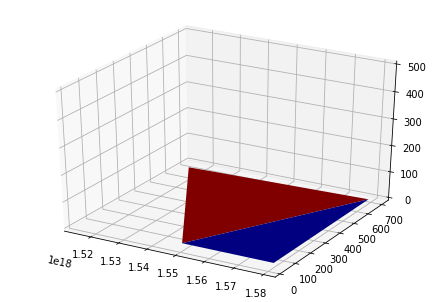

In [223]:
fig=plt.figure()
ax = Axes3D(fig)

surf = ax.plot_trisurf(tsla_Jan_cf.loc[:, "ExpirationDate"], tsla_Jan_cf.loc[:, "StrikePrice"], 
               tsla_Jan_cf.loc[:, "Volume"], cmap=cm.jet, linewidth=0.2)
ax.set_zlim(0, 500)
plt.show()

In [211]:
x1 = np.linspace(dates.min(), dates.max(), len(np.unique(dates)))
y1 = np.linspace(df_tsla0102.loc[:, "StrikePrice"].min(), df_tsla0102["StrikePrice"], 
                 len(df_tsla0102["StrikePrice"].unique()))

x2, y2 = np.meshgrid(x1, y1)

z2 = scipy.interpolate.griddata((df_tsla0102.loc[:, "ExpirationDate"], 
                                 df_tsla0102.loc[:, "StrikePrice"]), 
                                df_tsla0102.loc[:, "Volume"], (x2, y2), method = 'cubic')

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x2, y2, z2, rstride = 1, cstride = 1, cmap = cm.coolwarm, 
                       linewidth = 0, antialiased = False)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Meshgrid of Jan TSLA')

plt.show

# print(type(df_tsla0102["ExpirationDate"]))

QhullError: qhull precision warning: 
The initial hull is narrow (cosine of min. angle is 1.0000000000000000).
Is the input lower dimensional (e.g., on a plane in 3-d)?  Qhull may
produce a wide facet.  Options 'QbB' (scale to unit box) or 'Qbb' (scale
last coordinate) may remove this warning.  Use 'Pp' to skip this warning.
See 'Limitations' in qh-impre.htm.
QH6114 qhull precision error: initial simplex is not convex. Distance=-5.4e+02

While executing:  | qhull d Q12 Qt Qc Qbb Qz
Options selected for Qhull 2015.2.r 2016/01/18:
  run-id 942422935  delaunay  Q12-no-wide-dup  Qtriangulate  Qcoplanar-keep
  Qbbound-last  Qz-infinity-point  _pre-merge  _zero-centrum  Qinterior-keep
  Pgood  _max-width 6.4e+16  Error-roundoff 1.5e+03  _one-merge 1e+04
  Visible-distance 2.9e+03  U-coplanar-distance 2.9e+03  Width-outside 5.8e+03
  _wide-facet 1.7e+04  _narrow-hull  0

precision problems (corrected unless 'Q0' or an error)
      1 flipped facets

The input to qhull appears to be less than 3 dimensional, or a
computation has overflowed.

Qhull could not construct a clearly convex simplex from points:
- p872(v3): 1.5e+18 3.2e+02 6.4e+16
- p790(v2): 1.5e+18 6.8e+02 1.4e+16
- p791(v1): 1.6e+18    50 2.8e+16
- p0(v0): 1.5e+18 2.2e+02     0

The center point is coplanar with a facet, or a vertex is coplanar
with a neighboring facet.  The maximum round off error for
computing distances is 1.5e+03.  The center point, facets and distances
to the center point are as follows:

center point 1.542e+18    318.9 2.671e+16

facet p790 p791 p0 distance= -5.4e+04
facet p872 p791 p0 distance= -1.4e+02
facet p872 p790 p0 distance= -2.7e+02
facet p872 p790 p791 distance= -2.8e+02

These points either have a maximum or minimum x-coordinate, or
they maximize the determinant for k coordinates.  Trial points
are first selected from points that maximize a coordinate.

The min and max coordinates for each dimension are:
  0:  1.515e+18  1.579e+18  difference= 6.411e+16
  1:        20       680  difference=  660
  2:         0  6.411e+16  difference= 6.411e+16

If the input should be full dimensional, you have several options that
may determine an initial simplex:
  - use 'QJ'  to joggle the input and make it full dimensional
  - use 'QbB' to scale the points to the unit cube
  - use 'QR0' to randomly rotate the input for different maximum points
  - use 'Qs'  to search all points for the initial simplex
  - use 'En'  to specify a maximum roundoff error less than 1.5e+03.
  - trace execution with 'T3' to see the determinant for each point.

If the input is lower dimensional:
  - use 'QJ' to joggle the input and make it full dimensional
  - use 'Qbk:0Bk:0' to delete coordinate k from the input.  You should
    pick the coordinate with the least range.  The hull will have the
    correct topology.
  - determine the flat containing the points, rotate the points
    into a coordinate plane, and delete the other coordinates.
  - add one or more points to make the input full dimensional.


In [213]:
tsla_Jan_cf.loc[:, "ExpirationDate"] = pd.to_datetime(tsla_Jan_cf.loc[:, "ExpirationDate"]).values

/Users/birdshaw/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [236]:
df_tsla0102 = df_tsla0102.reset_index()

In [337]:
df_tsla0102.tail()

index                        optionkey Symbol ExpirationDate PutCall  \
867  668319  TSLA2020-01-17c570.002018-01-02   TSLA     2020-01-17    call   
868  668321  TSLA2020-01-17c580.002018-01-02   TSLA     2020-01-17    call   
869  668323  TSLA2020-01-17c590.002018-01-02   TSLA     2020-01-17    call   
870  668325  TSLA2020-01-17c600.002018-01-02   TSLA     2020-01-17    call   
871  668327  TSLA2020-01-17c610.002018-01-02   TSLA     2020-01-17    call   

     StrikePrice  Volume    DataDate  
867        570.0       0  2018-01-02  
868        580.0       0  2018-01-02  
869        590.0       0  2018-01-02  
870        600.0     618  2018-01-02  
871        610.0      11  2018-01-02

In [240]:
df_tsla_test = df_tsla0102.loc[22: 32]

df_tsla_test

index                        optionkey Symbol ExpirationDate PutCall  \
22  666629  TSLA2018-01-05c300.002018-01-02   TSLA     2018-01-05    call   
23  666631  TSLA2018-01-05c302.502018-01-02   TSLA     2018-01-05    call   
24  666633  TSLA2018-01-05c305.002018-01-02   TSLA     2018-01-05    call   
25  666635  TSLA2018-01-05c307.502018-01-02   TSLA     2018-01-05    call   
26  666637  TSLA2018-01-05c310.002018-01-02   TSLA     2018-01-05    call   
27  666639  TSLA2018-01-05c312.502018-01-02   TSLA     2018-01-05    call   
28  666641  TSLA2018-01-05c315.002018-01-02   TSLA     2018-01-05    call   
29  666643  TSLA2018-01-05c317.502018-01-02   TSLA     2018-01-05    call   
30  666645  TSLA2018-01-05c320.002018-01-02   TSLA     2018-01-05    call   
31  666647  TSLA2018-01-05c322.502018-01-02   TSLA     2018-01-05    call   
32  666649  TSLA2018-01-05c325.002018-01-02   TSLA     2018-01-05    call   

    StrikePrice  Volume    DataDate  
22        300.0      50  2018-01-02  
23        302.5       8  2018-01-02  
24        305.0      32  2018-01-02  
25        307.5     139  2018-01-02  
26        310.0     217  2018-01-02  
27        312.5     406  2018-01-02  
28        315.0     964  2018-01-02  
29        317.5     544  2018-01-02  
30        320.0    2334  2018-01-02  
31        322.5     501  2018-01-02  
32        325.0    1580  2018-01-02

<IPython.core.display.Javascript object>


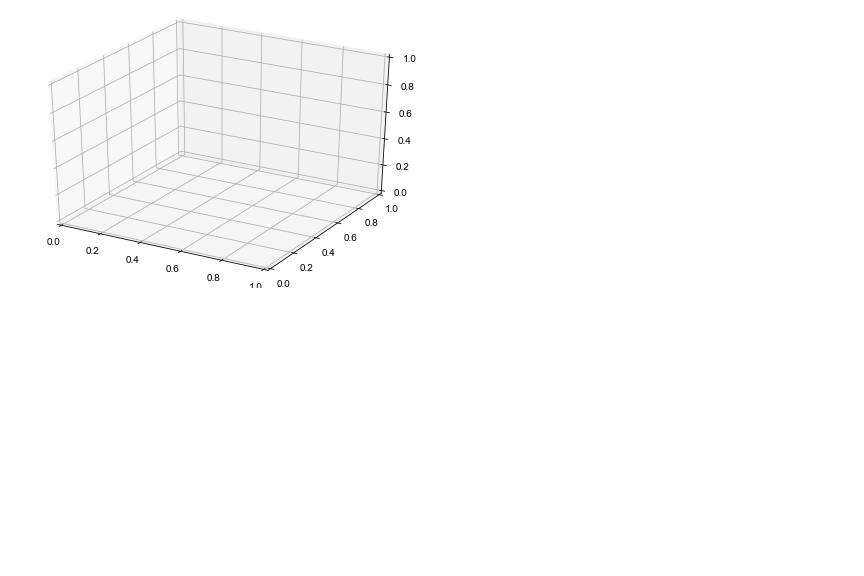

ValueError: shape mismatch: objects cannot be broadcast to a single shape

In [328]:
%matplotlib notebook

fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
ax = Axes3D(fig)

# df_tsla_test2[:, 0]
expdate = ['2018-01-02']
strikeprice = ['300', '302.5', '305', '307.5', '310', '312.5', '315', '317.5', '320', '322.5', '325']


lx = len(df_tsla_test2[0])
ly = len(df_tsla_test2[:, 0])

xpos = np.arange(0, lx, 1)
ypos = np.arange(0, ly, 1)
# ypos = df_tsla_test.loc[:, "StrikePrice"]

xpos, ypos = np.meshgrid(xpos+0.25, ypos+0.25)

xpos = xpos.flatten()
ypos = ypos.flatten()
zpos = np.zeros(ly)

dx = np.ones_like(zpos)
dy = dx.copy()
dz = df_tsla_test2[:, 2]

ax.bar3d(xpos, ypos, zpos, dx, dy, dz)

ax.w_yaxis.set_ticklabels(strikeprice)
ax.w_xaxis.set_ticklabels(expdate)

plt.show()

<IPython.core.display.Javascript object>


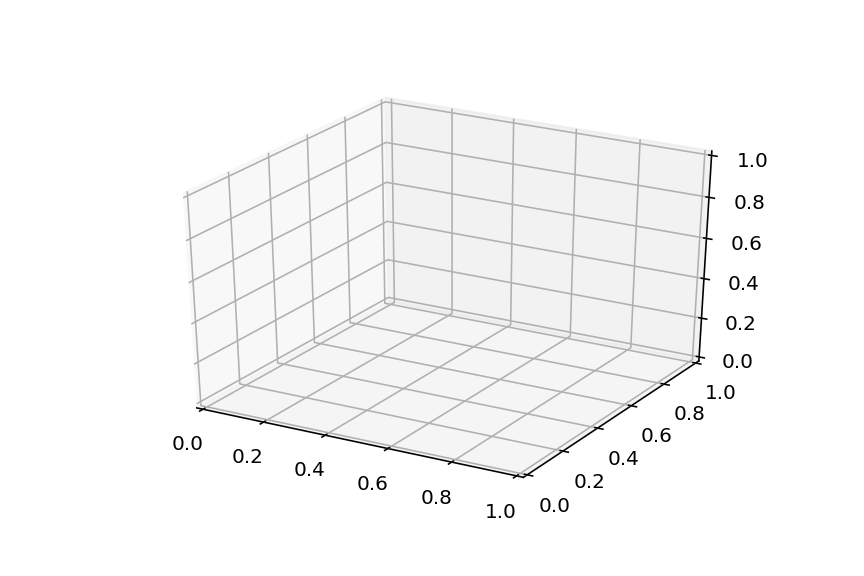

ValueError: Argument Z must be 2-dimensional.

In [282]:
# %matplotlib notebook

x = df_tsla_test2[:, 0]
y = df_tsla_test2[:, 1]
X,Y = np.meshgrid(x,y)
Z = df_tsla_test2[:, 2]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)

In [280]:
df_tsla_test2 = df_tsla_test

df_tsla_test2.loc[:, "ExpirationDate"] = dates

df_tsla_test2 = df_tsla_test2[["ExpirationDate", "StrikePrice", "Volume"]].to_numpy()

df_tsla_test2

array([[7.36699e+05, 3.00000e+02, 5.00000e+01],
       [7.36699e+05, 3.02500e+02, 8.00000e+00],
       [7.36699e+05, 3.05000e+02, 3.20000e+01],
       [7.36699e+05, 3.07500e+02, 1.39000e+02],
       [7.36699e+05, 3.10000e+02, 2.17000e+02],
       [7.36699e+05, 3.12500e+02, 4.06000e+02],
       [7.36699e+05, 3.15000e+02, 9.64000e+02],
       [7.36699e+05, 3.17500e+02, 5.44000e+02],
       [7.36699e+05, 3.20000e+02, 2.33400e+03],
       [7.36699e+05, 3.22500e+02, 5.01000e+02],
       [7.36699e+05, 3.25000e+02, 1.58000e+03]])

(3, 6)


<IPython.core.display.Javascript object>


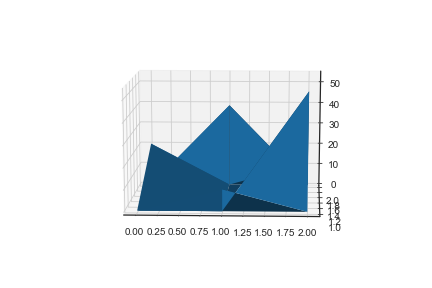

In [103]:
data = [
    [0, 0, 0, 20, 0, 0],
    [0, 10, 0, 0, 39, 0],
    [0, 0, 54, 0, 0, 11]
]

import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

df = pd.DataFrame(data)

Y1 = range(df.shape[0])
X1 = [1, 1, 1, 2, 2, 2,]
X2, Y2 = np.meshgrid(X1, Y1)

print(df.shape)

threedee = plt.figure().gca(projection='3d')
threedee.plot_surface(Y2, X2, df)

plt.show()

In [ ]:
data = [
    [0, 0, 0, 20, 0, 0],
    [0, 10, 0, 0, 39, 0],
    [0, 0, 54, 0, 0, 11]
]

import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

df = pd.DataFrame(data)

Y1 = range(df.shape[0])
X1 = [1, 1, 1, 2, 2, 2,]
X2, Y2 = np.meshgrid(X1, Y1)

print(df.shape)

threedee = plt.figure().gca(projection='3d')
threedee.plot_surface(Y2, X2, df)



In [264]:
print((df_tsla_test.loc[22, "ExpirationDate"]))

2018-01-05 00:00:00


In [256]:
dates = matplotlib.dates.date2num(df_tsla_test.loc[:, "ExpirationDate"])

dates
# dates.max()

array([736699., 736699., 736699., 736699., 736699., 736699., 736699.,
       736699., 736699., 736699., 736699.])

/Users/birdshaw/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


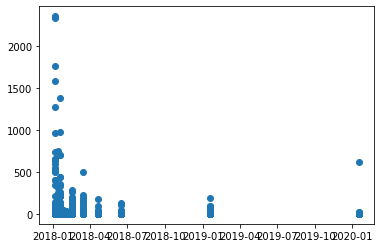

In [215]:
plt.plot_date(dates, df_tsla0102.loc[:, "Volume"])

In [442]:
df_tsla0102.head()
vol_test = df_Jan_tsla_c.loc[:, "Volume"].to_numpy()
print(len(vol_test))

1214


In [460]:
arrays = [df_Jan_tsla_c.loc[:, "ExpirationDate"],df_Jan_tsla_c.loc[:, "StrikePrice"]]
tuples = list(zip(*arrays))
index = pd.MultiIndex.from_tuples(tuples, names=['ExpirationDate', 'StrikePrice'])         

df_multi_index = pd.DataFrame({"Volume": vol_test}, index=index)

df = df_multi_index.unstack().fillna(0).stack()

df.shape

(2384, 1)

In [82]:
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

# Set plotting style
plt.style.use('seaborn-white')

In [462]:
L = []
for i, group in df.groupby(level=1)['Volume']:
    L.append(group.values)
z = np.hstack(L).ravel()
z.shape

(2384,)

In [463]:
xlabels = df.index.get_level_values('ExpirationDate').unique()
ylabels = df.index.get_level_values('StrikePrice').unique()
x = np.arange(xlabels.shape[0])
y = np.arange(ylabels.shape[0])
print(xlabels.shape, ylabels.shape, x.shape, y.shape)

(16,) (149,) (16,) (149,)


In [464]:
x_M, y_M = np.meshgrid(x, y, copy=False)
x_M.shape, y_M.shape

((149, 16), (149, 16))

# Helper Function to create 3D Barplot

12
[ 0  1  2  3  4  5  6  7  8  9 10 11 12]


<IPython.core.display.Javascript object>


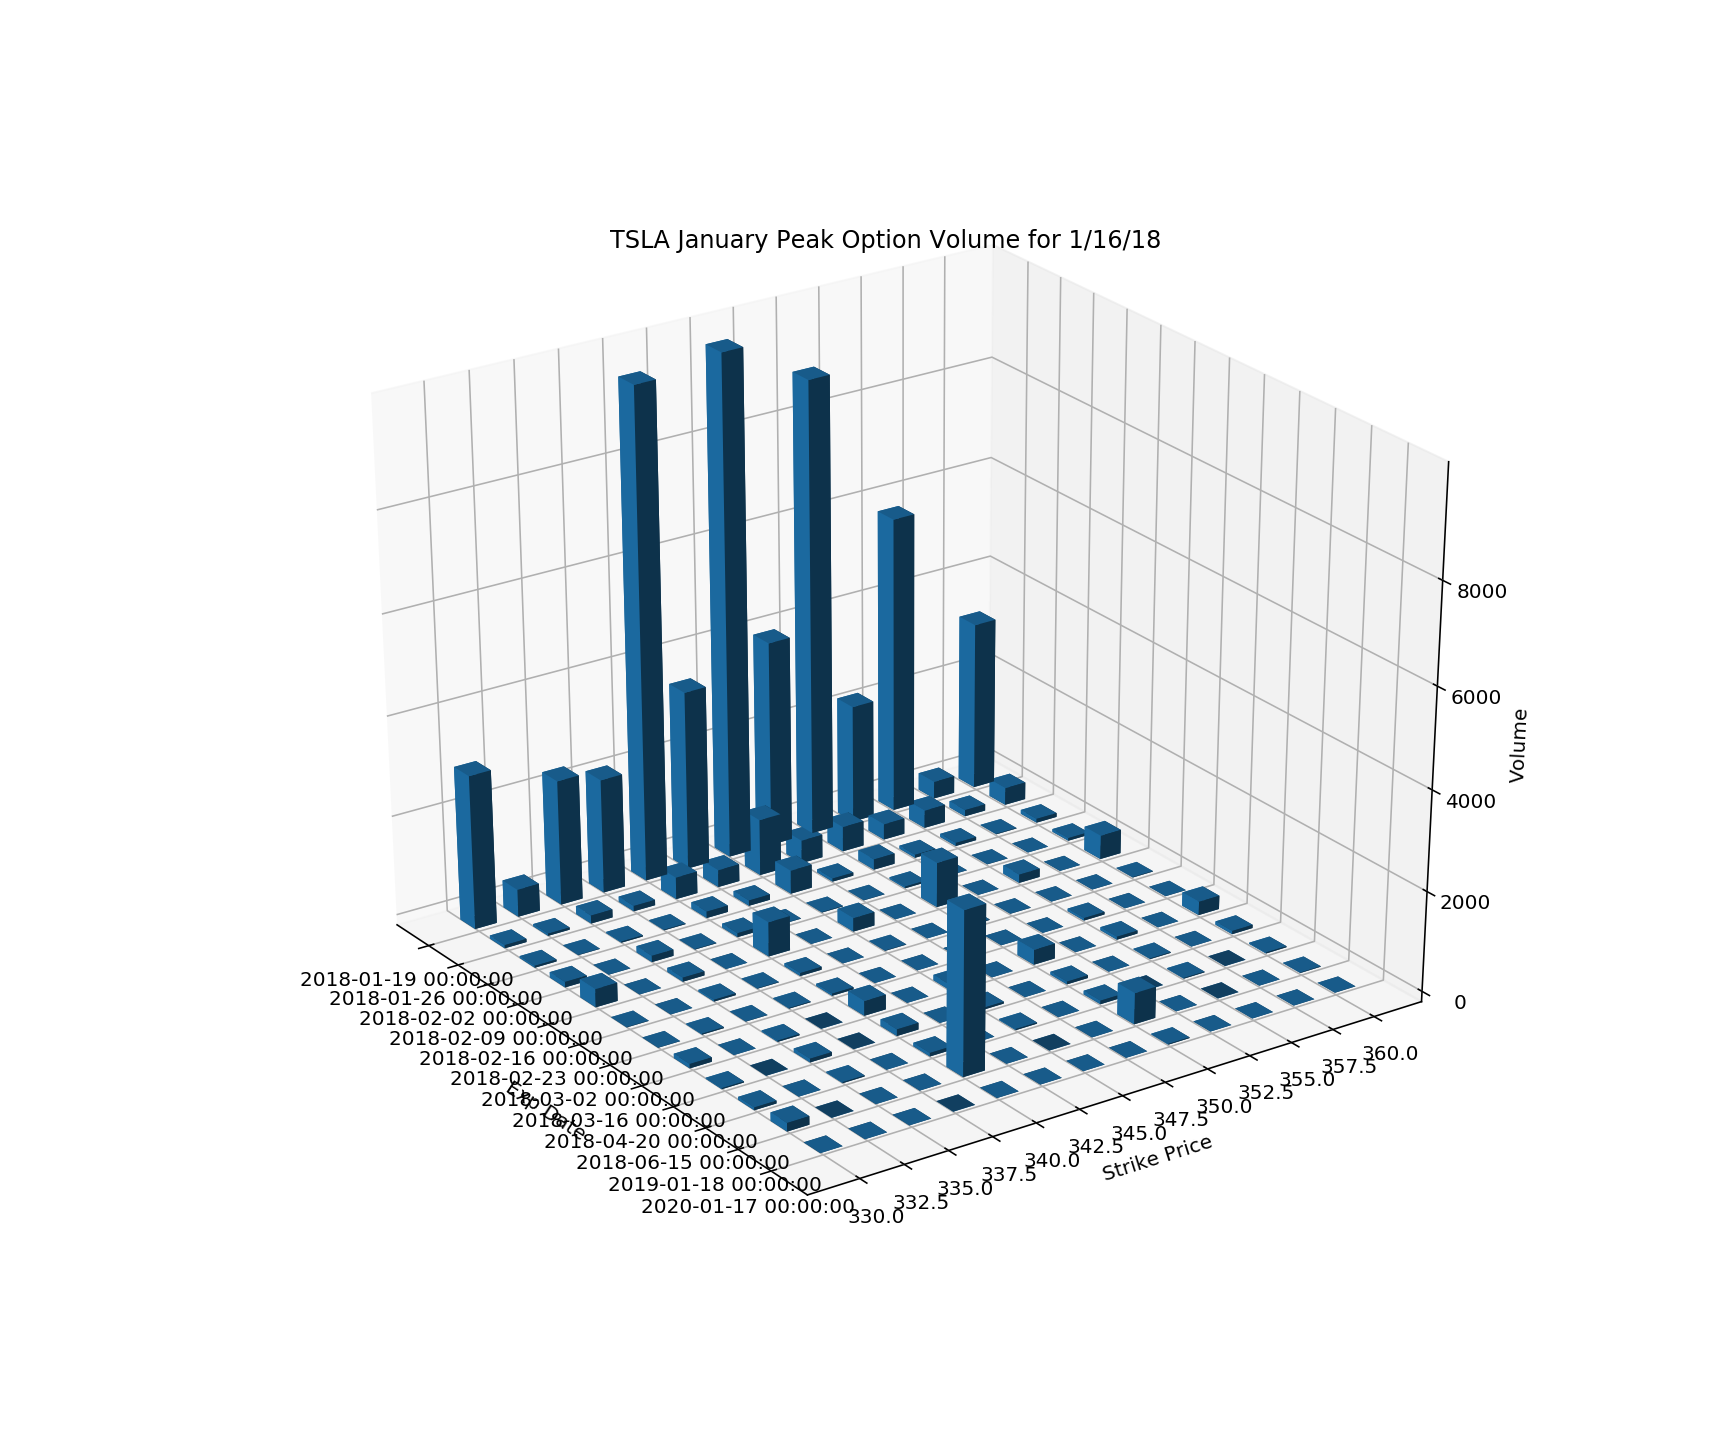

In [51]:
def barplotting(dataFrame):
    %matplotlib notebook
    # Prep simplified dataframe and format it to be plottable
    arrays = [dataFrame.loc[:, "ExpirationDate"],dataFrame.loc[:, "StrikePrice"]]
    tuples = list(zip(*arrays))
    index = pd.MultiIndex.from_tuples(tuples, names=['ExpirationDate', 'StrikePrice'])         
    vol = dataFrame.loc[:, "Volume"].to_numpy()

    df_multi_index = pd.DataFrame({"Volume": vol}, index=index)

    df = df_multi_index.unstack().fillna(0).stack()

    # Set up z
    L = []
    for i, group in df.groupby(level=1)['Volume']:
        L.append(group.values)
    z = np.hstack(L).ravel()
    z.shape

    # Set up labels, x, and y
    xlabels = df.index.get_level_values('ExpirationDate').unique()
    ylabels = df.index.get_level_values('StrikePrice').unique()
    print(xlabels.shape[0])
    x = np.arange(xlabels.shape[0])
    y = np.arange(ylabels.shape[0])
    print(y)

    # Set up meshgrid (matrix) for plotting
    x_M, y_M = np.meshgrid(x, y, copy=False)
    x_M.shape, y_M.shape

    # Plotting code
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111, projection='3d')
    # ax = Axes3D(fig)

    # Making the intervals in the axes match with their respective entries
    ax.w_xaxis.set_ticks(x + 0.5/2.)
    ax.w_yaxis.set_ticks(y + 0.5/2.)

    # Renaming the ticks as they were before
    ax.w_xaxis.set_ticklabels(xlabels)
    ax.w_yaxis.set_ticklabels(ylabels)

    # Labeling the 3 dimensions
    ax.set_xlabel('Exp Date')
    ax.set_ylabel('Strike Price')
    ax.set_zlabel('Volume')
    ax.set_title("TSLA January Peak Option Volume for 1/16/18")
#     ax.set_xlim3d(2,4.5)
    

    # Choosing the range of values to be extended in the set colormap
    # values = np.linspace(0.2, 1., x_M.ravel().shape[0])

    # Selecting an appropriate colormap
    # colors = plt.cm.Spectral(values)
    ax.bar3d(x_M.ravel(), y_M.ravel(), z*0, dx=0.5, dy=0.5, dz=z)
#     ax.margins(x = 0, y=-.4, z=0)
#     ax.set_zlim(20, 40)
    plt.show()
    
barplotting(df_tsla0116)

In [99]:
df_Jan_testing = df_Jan[(df_Jan["Symbol"] == "TSLA") & (df_Jan["PutCall"] == "call") & (df_Jan["DataDate"] == "2018-01-02")]

In [85]:
# df_tsla_weeks.loc[:, "DataDate"] = pd.to_datetime(df_tsla_weeks.loc[:, "DataDate"])

weeks_opt_tsla = [g for n, g in tsla_Jan_c.groupby(pd.Grouper(key='DataDate',freq='W'))]

tsla_week1 = weeks_opt_tsla[1]

# print(type(week_test.loc[6, "DataDate"]))

# weeks_opt_tsla[1]

week_test = tsla_week1.groupby(["ExpirationDate", "StrikePrice"]).sum().reset_index()

week_test = week_test[(week_test["StrikePrice"] >= 300) & (week_test["StrikePrice"] <= 330)]

week_test


ExpirationDate  StrikePrice  AskPrice  AskSize  BidPrice  BidSize  \
22      2018-01-12        300.0    185.35       82    173.70      196   
23      2018-01-12        302.5    173.40       57    160.85      115   
24      2018-01-12        305.0    159.60      109    149.65      225   
25      2018-01-12        307.5    147.65      116    137.35      236   
26      2018-01-12        310.0    135.15       76    124.85      266   
..             ...          ...       ...      ...       ...      ...   
920     2020-01-17        310.0    474.50      104    453.10      116   
921     2020-01-17        315.0    461.50      100    441.40       88   
922     2020-01-17        320.0    450.55       98    428.75      108   
923     2020-01-17        325.0    437.55      103    417.15       81   
924     2020-01-17        330.0    425.95       93    405.90       86   

     LastPrice  Volume  openinterest  UnderlyingPrice  
22      180.54     274          2628          1679.04  
23      153.19      64           223          1679.04  
24      150.19      46          3620          1679.04  
25      136.76      39           842          1679.04  
26      128.23    1026          3682          1679.04  
..         ...     ...           ...              ...  
920     420.95      24           488          1679.04  
921     408.19       6          1303          1679.04  
922     354.43      27           416          1679.04  
923     280.42      10           285          1679.04  
924     381.07     226          1113          1679.04  

[130 rows x 10 columns]

In [491]:
# df_FEB.nlargest(5, ["Volume"])
print(type(df_Feb.loc[34, "ExpirationDate"]))

<class 'str'>


In [87]:
df_Jan_tsla_c = df_Jan_filt[(df_Jan_filt["Symbol"] == "TSLA") & (df_Jan_filt["PutCall"] == "call")]

In [510]:
df_Jan_help_test.loc[1, "ExpirationDate"]

'2018-01-05'

In [511]:
df_Jan_help_test = df_Jan[df_Jan["Symbol"] == "TSLA"].nlargest(5, ["Volume"])
df_Jan_help_test = df_Jan_help_test.reset_index()
blank_lst = []
df_Jan_help_test.loc[0, "ExpirationDate"]
blank_lst.append(df_Jan_help_test.loc[0, "ExpirationDate"])
# df_Jan_help_test
print(blank_lst)

['2018-01-19']


# Work to build correlation by finding success percentage

In [121]:
tops_Jan[0, 0] == df_tsla_tops.loc[0, "Date Time"]

True

In [118]:
tops_Jan[0, 0], df_tsla_tops.loc[0, "Date Time"]

# df_tsla_tops

('2018-01-02', '2018-01-02')

In [71]:
tops_Jan

low_lst = []
high_lst = []


for i in len(tops_Jan.shape[0]):
    if tops_Jan[i, 0] == df_tsla_tops.loc[i, "Date Time"]:
        low_lst.append()
    

array([['2018-01-02', '2018-01-05', '330.0', '2353'],
       ['2018-01-02', '2018-01-05', '320.0', '2334'],
       ['2018-01-02', '2018-01-05', '340.0', '1755'],
       ['2018-01-02', '2018-01-05', '325.0', '1580'],
       ['2018-01-03', '2018-01-05', '320.0', '3069'],
       ['2018-01-03', '2018-01-05', '325.0', '3007'],
       ['2018-01-03', '2018-01-05', '330.0', '2294'],
       ['2018-01-03', '2018-01-05', '335.0', '1771'],
       ['2018-01-04', '2018-01-05', '320.0', '20990'],
       ['2018-01-04', '2018-01-05', '315.0', '13345'],
       ['2018-01-04', '2018-01-05', '317.5', '6900'],
       ['2018-01-04', '2018-01-05', '322.5', '5231'],
       ['2018-01-05', '2018-01-05', '315.0', '19227'],
       ['2018-01-05', '2018-01-05', '317.5', '10688'],
       ['2018-01-05', '2018-01-05', '320.0', '8786'],
       ['2018-01-05', '2018-01-12', '330.0', '3104'],
       ['2018-01-08', '2018-01-12', '330.0', '13851'],
       ['2018-01-08', '2018-01-12', '340.0', '11804'],
       ['2018-01-08', 

In [249]:
df_Jan_tops = pd.DataFrame({"Data Date": tops_Jan[:, 0], "Exp Date": tops_Jan[:, 1], "Strike Price": tops_Jan[:, 2]
                           , "Volume": tops_Jan[:, 3]})#, "High": 0, "Low": 0, "Success": 0})

df_Jan_tops

Data Date    Exp Date Strike Price Volume
0   2018-01-02  2018-01-05        330.0   2353
1   2018-01-02  2018-01-05        320.0   2334
2   2018-01-02  2018-01-05        340.0   1755
3   2018-01-03  2018-01-05        320.0   3069
4   2018-01-03  2018-01-05        325.0   3007
..         ...         ...          ...    ...
58  2018-01-30  2018-02-02        355.0   3998
59  2018-01-30  2018-02-02        345.0   3524
60  2018-01-31  2018-02-02        360.0   8325
61  2018-01-31  2018-02-02        355.0   7884
62  2018-01-31  2018-02-02        350.0   7307

[63 rows x 4 columns]

In [335]:
# DataFrames based on either daily high/lows (so quick sell) or the actual set expiration date


df_merge_daily = pd.merge(df_Jan_tops, df_merge_test, how="inner", left_on="Data Date", right_on="Date Time")
df_merge_exp = pd.merge(df_Jan_tops, df_merge_test, how="inner", left_on="Exp Date", right_on="Date Time")
df_merge_daily.head(30)

df_merge_daily["Success"] = (df_merge_daily["Strike Price"] >= df_merge_daily["Low"]) & (df_merge_daily["Strike Price"] <= df_merge_daily["High"])
df_merge_daily["Success"] = df_merge_daily["Success"].astype(int)

df_merge_exp["Success"] = (df_merge_exp["Strike Price"] >= df_merge_exp["Low"]) & (df_merge_exp["Strike Price"] <= df_merge_exp["High"])
df_merge_exp["Success"] = df_merge_exp["Success"].astype(int)

In [337]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df_merge_daily)

# df_merge_daily["Success"].sum()

Data Date    Exp Date Strike Price Volume    High      Low  Success
0   2018-01-02  2018-01-05        330.0   2353  322.11      311        0
1   2018-01-02  2018-01-05        320.0   2334  322.11      311        1
2   2018-01-02  2018-01-05        340.0   1755  322.11      311        0
3   2018-01-03  2018-01-05        320.0   3069  325.25   315.55        1
4   2018-01-03  2018-01-05        325.0   3007  325.25   315.55        1
5   2018-01-03  2018-01-05        330.0   2294  325.25   315.55        0
6   2018-01-04  2018-01-05        320.0  20990  318.55   305.68        0
7   2018-01-04  2018-01-05        315.0  13345  318.55   305.68        1
8   2018-01-04  2018-01-05        317.5   6900  318.55   305.68        1
9   2018-01-05  2018-01-05        315.0  19227  317.24      312        1
10  2018-01-05  2018-01-05        317.5  10688  317.24      312        0
11  2018-01-05  2018-01-05        320.0   8786  317.24      312        0
12  2018-01-08  2018-01-12        330.0  13851  337.02    315.5        1
13  2018-01-08  2018-01-12        340.0  11804  337.02    315.5        0
14  2018-01-08  2018-01-12        335.0   6465  337.02    315.5        1
15  2018-01-09  2018-01-12        340.0  10223   338.8  327.405        0
16  2018-01-09  2018-01-12        335.0   9338   338.8  327.405        1
17  2018-01-09  2018-01-19        340.0   5277   338.8  327.405        0
18  2018-01-10  2018-01-12        340.0   7257     337      330        0
19  2018-01-10  2018-01-12        335.0   6662     337      330        1
20  2018-01-10  2018-01-19        360.0   6295     337      330        0
21  2018-01-11  2018-01-12        340.0  16504  344.81   333.26        1
22  2018-01-11  2018-01-12        345.0  13410  344.81   333.26        0
23  2018-01-11  2018-01-12        342.5   8434  344.81   333.26        1
24  2018-01-12  2018-01-12        337.5  18130  340.41   333.67        1
25  2018-01-12  2018-01-12        340.0  15720  340.41   333.67        1
26  2018-01-12  2018-01-12        335.0  13123  340.41   333.67        1
27  2018-01-16  2018-01-19        345.0   9988     345    334.8        0
28  2018-01-16  2018-01-19        340.0   9778     345    334.8        1
29  2018-01-16  2018-01-19        350.0   9061     345    334.8        0
30  2018-01-17  2018-01-19        350.0  14549     349   339.75        0
31  2018-01-17  2018-01-19        345.0   9004     349   339.75        1
32  2018-01-17  2018-01-19        355.0   6771     349   339.75        0
33  2018-01-18  2018-01-19        350.0  14499   352.3   343.74        1
34  2018-01-18  2018-01-19        355.0  10571   352.3   343.74        0
35  2018-01-18  2018-01-19        352.5   6683   352.3   343.74        0
36  2018-01-19  2018-01-19        350.0  25403  350.59    342.6        1
37  2018-01-19  2018-01-19        347.5  12945  350.59    342.6        1
38  2018-01-19  2018-01-19        345.0  12150  350.59    342.6        1
39  2018-01-22  2018-01-26        355.0   7030  357.83    349.2        1
40  2018-01-22  2018-01-26        360.0   6692  357.83    349.2        0
41  2018-01-22  2018-01-26        370.0   4956  357.83    349.2        0
42  2018-01-23  2018-01-26        360.0   8057   360.5      351        1
43  2018-01-23  2018-01-26        355.0   7323   360.5      351        1
44  2018-01-23  2018-01-26        370.0   4234   360.5      351        0
45  2018-01-24  2018-01-26        355.0   8759  354.75   343.52        0
46  2018-01-24  2018-01-26        350.0   7925  354.75   343.52        1
47  2018-01-24  2018-01-26        360.0   7268  354.75   343.52        0
48  2018-01-25  2018-01-26        350.0  11631   349.2    336.4        0
49  2018-01-25  2018-01-26        345.0   8678   349.2    336.4        1
50  2018-01-25  2018-01-26        352.5   6439   349.2    336.4        0
51  2018-01-26  2018-01-26        342.5  13752     344   335.71        1
52  2018-01-26  2018-01-26        340.0  13011     344   335.71        1
53  2018-01-26  2018-01-26        345.0  10823     344   335.71

In [206]:
# Changing data types to int from string

# print(range(df_merge.loc[0, "Low"], df_merge.loc[0, "High"]))

# df_merge.dtypes
convert = df_merge.columns.drop(["Date Time", "Exp Date"])
# convert.columns
df_merge[convert] = df_merge[convert].apply(pd.to_numeric)
df_merge.head(20)
# print(type(df_merge.loc[0, "Volume"]))

Date Time    Exp Date  Strike Price  Volume    High     Low
0   2018-01-02  2018-01-05         330.0    2353  322.11  311.00
1   2018-01-02  2018-01-05         320.0    2334  322.11  311.00
2   2018-01-02  2018-01-05         340.0    1755  322.11  311.00
3   2018-01-02  2018-01-05         325.0    1580  322.11  311.00
4   2018-01-03  2018-01-05         320.0    3069  325.25  315.55
5   2018-01-03  2018-01-05         325.0    3007  325.25  315.55
6   2018-01-03  2018-01-05         330.0    2294  325.25  315.55
7   2018-01-03  2018-01-05         335.0    1771  325.25  315.55
8   2018-01-04  2018-01-05         320.0   20990  318.55  305.68
9   2018-01-04  2018-01-05         315.0   13345  318.55  305.68
10  2018-01-04  2018-01-05         317.5    6900  318.55  305.68
11  2018-01-04  2018-01-05         322.5    5231  318.55  305.68
12  2018-01-05  2018-01-05         315.0   19227  317.24  312.00
13  2018-01-05  2018-01-05         317.5   10688  317.24  312.00
14  2018-01-05  2018-01-05         320.0    8786  317.24  312.00
15  2018-01-05  2018-01-12         330.0    3104  317.24  312.00
16  2018-01-08  2018-01-12         330.0   13851  337.02  315.50
17  2018-01-08  2018-01-12         340.0   11804  337.02  315.50
18  2018-01-08  2018-01-12         335.0    6465  337.02  315.50
19  2018-01-08  2018-01-19         350.0    5775  337.02  315.50

In [204]:
# if df_merge["Strike Price"] in range(df_merge["Low"], df_merge["High"]):
#     print(Ture)
    
range(df_merge["Low"].values, df_merge["High"].values)

TypeError: only integer scalar arrays can be converted to a scalar index

In [218]:
# Changing data types to int from string

df_merge_test = df_tsla_tops 
df_merge_test
df_merge_test = df_merge_test.drop(columns=['Open', 'Close', 'Change', 'Volume'], axis = 0)

df_merge_test = df_merge_test.set_index('Date Time')
df_merge_test = df_merge_test.drop(columns=['index'])

In [219]:
# df_merge_test 
# df_merge_test = df_merge_test.drop(columns=['Open', 'Close', 'Change', 'Volume'])
df_merge_test

0             High      Low
Date Time                  
2018-01-02  322.11      311
2018-01-03  325.25   315.55
2018-01-04  318.55   305.68
2018-01-05  317.24      312
2018-01-08  337.02    315.5
...            ...      ...
2018-12-24   314.5  295.195
2018-12-26  326.97   294.09
2018-12-27  322.17    301.5
2018-12-28  336.24   318.41
2018-12-31  339.21   325.26

[251 rows x 2 columns]

In [457]:
# Allows the use of groupby and still use masking to get columns.

df_Jan_tsla_c = df_Jan_tsla_c.groupby(["ExpirationDate", "StrikePrice"], as_index=False).sum()

df_Jan_tsla_c["ExpirationDate"]

0       2018-01-05
1       2018-01-05
2       2018-01-05
3       2018-01-05
4       2018-01-05
           ...    
1209    2020-01-17
1210    2020-01-17
1211    2020-01-17
1212    2020-01-17
1213    2020-01-17
Name: ExpirationDate, Length: 1214, dtype: object

In [427]:
df_Jan_tsla_c[(df_Jan_tsla_c["StrikePrice"] == 225.0) & (df_Jan_tsla_c["ExpirationDate"] == "2018-01-05")]

optionkey Symbol ExpirationDate PutCall  \
666585   TSLA2018-01-05c225.002018-01-02   TSLA     2018-01-05    call   
1609009  TSLA2018-01-05c225.002018-01-03   TSLA     2018-01-05    call   
2370832  TSLA2018-01-05c225.002018-01-04   TSLA     2018-01-05    call   
2918909  TSLA2018-01-05c225.002018-01-05   TSLA     2018-01-05    call   

         StrikePrice  Volume    DataDate  
666585         225.0       1  2018-01-02  
1609009        225.0       1  2018-01-03  
2370832        225.0       4  2018-01-04  
2918909        225.0       3  2018-01-05

In [59]:
# df_Jan_tsla_c.groupby(["StrikePrice", "DataDate"], as_index=False).sum()

In [60]:
# df_Jan_tsla_c[0]

In [58]:
from numpy import pi, sin, cos, mgrid
dphi, dtheta = pi/250.0, pi/250.0
[phi,theta] = mgrid[0:pi+dphi*1.5:dphi,0:2*pi+dtheta*1.5:dtheta]
m0 = 4; m1 = 3; m2 = 2; m3 = 3; m4 = 6; m5 = 2; m6 = 6; m7 = 4;
r = sin(m0*phi)**m1 + cos(m2*phi)**m3 + sin(m4*theta)**m5 + cos(m6*theta)**m7
x = r*sin(phi)*cos(theta)
y = r*cos(phi)
z = r*sin(phi)*sin(theta)

# View it.
from mayavi import mlab
s = mlab.mesh(x, y, z)
mlab.show()

# Important to add new column to remove duplicates in order to plot properly!

In [170]:
tsla_succ_test = tsla_succ_Jan_daily

tsla_succ_test["Merge Date"] = "Date " + tsla_succ_test["Data Date"] + " Exp " + tsla_succ_test["Exp Date"]

tsla_succ_test

clr_data_c = tsla_succ_test["Success"]

clr_data_c = clr_data_c.to_numpy()

Data Date    Exp Date  Strike Price  Volume    High      Low  Success  \
0   2018-01-02  2018-01-05         330.0    2353  322.11  311.000        0   
1   2018-01-02  2018-01-05         320.0    2334  322.11  311.000        1   
2   2018-01-03  2018-01-05         320.0    3069  325.25  315.550        1   
3   2018-01-03  2018-01-05         325.0    3007  325.25  315.550        1   
4   2018-01-04  2018-01-05         320.0   20990  318.55  305.680        0   
5   2018-01-04  2018-01-05         315.0   13345  318.55  305.680        1   
6   2018-01-05  2018-01-05         315.0   19227  317.24  312.000        1   
7   2018-01-05  2018-01-05         317.5   10688  317.24  312.000        0   
8   2018-01-08  2018-01-12         330.0   13851  337.02  315.500        1   
9   2018-01-08  2018-01-12         340.0   11804  337.02  315.500        0   
11  2018-01-09  2018-01-12         335.0    9338  338.80  327.405        1   
10  2018-01-09  2018-01-12         340.0   10223  338.80  327.405        0   
12  2018-01-10  2018-01-12         340.0    7257  337.00  330.000        0   
13  2018-01-10  2018-01-12         335.0    6662  337.00  330.000        1   
14  2018-01-11  2018-01-12         340.0   16504  344.81  333.260        1   
15  2018-01-11  2018-01-12         345.0   13410  344.81  333.260        0   
16  2018-01-12  2018-01-12         337.5   18130  340.41  333.670        1   
17  2018-01-12  2018-01-12         340.0   15720  340.41  333.670        1   
18  2018-01-16  2018-01-19         345.0    9988  345.00  334.800        1   
19  2018-01-16  2018-01-19         340.0    9778  345.00  334.800        1   
21  2018-01-17  2018-01-19         345.0    9004  349.00  339.750        1   
20  2018-01-17  2018-01-19         350.0   14549  349.00  339.750        0   
22  2018-01-18  2018-01-19         350.0   14499  352.30  343.740        1   
23  2018-01-18  2018-01-19         355.0   10571  352.30  343.740        0   
24  2018-01-19  2018-01-19         350.0   25403  350.59  342.600        1   
25  2018-01-19  2018-01-19         347.5   12945  350.59  342.600        1   
26  2018-01-22  2018-01-26         355.0    7030  357.83  349.200        1   
27  2018-01-22  2018-01-26         360.0    6692  357.83  349.200        0   
28  2018-01-23  2018-01-26         360.0    8057  360.50  351.000        1   
29  2018-01-23  2018-01-26         355.0    7323  360.50  351.000        1   
31  2018-01-24  2018-01-26         350.0    7925  354.75  343.520        1   
30  2018-01-24  2018-01-26         355.0    8759  354.75  343.520        0   
32  2018-01-25  2018-01-26         350.0   11631  349.20  336.400        0   
33  2018-01-25  2018-01-26         345.0    8678  349.20  336.400        1   
34  2018-01-26  2018-01-26         342.5   13752  344.00  335.710        1   
35  2018-01-26  2018-01-26         340.0   13011  344.00  335.710        1   
36  2018-01-29  2018-02-02         350.0   10240  350.85  338.280        1   
37  2018-01-29  2018-02-02         355.0    5705  350.85  338.280        0   
38  2018-01-30  2018-02-02         350.0    4507  348.27  342.170        0   
39  2018-01-30  2018-02-02         355.0    3998  348.27  342.170        0   
40  2018-01-31  2018-02-02         360.0    8325  356.19  345.190        0   
41  2018-01-31  2018-02-02         355.0    7884  356.19  345.190        1   

                        Merge Date  
0   Date 2018-01-02 Exp 2018-01-05  
1   Date 2018-01-02 Exp 2018-01-05  
2   Date 2018-01-03 Exp 2018-01-05  
3   Date 2018-01-03 Exp 2018-01-05  
4   Date 2018-01-04 Exp 2018-01-05  
5   Date 2018-01-04 Exp 2018-01-05  
6   Date 2018-01-05 Exp 2018-01-05  
7   Date 2018-01-05 Exp 2018-01-05  
8   Date 2018-01-08 Exp 2018-01-12  
9   Date 2018-01-08 Exp 2018-01-12  
11  Date 2018-01-09 Exp 2018-01-12  
10  Date 2018-01-09 Exp 2018-01-12  
12  Date 2018-01-10 Exp 2018-01-12  
13  Date 2018-01-10 Exp 2018-01-12  
14  Date 2018-01-11 Exp 2018-01-12  
15  Date 2018-01-11 Exp 2018-01-12  
16  Date 2018-01-12 E

In [86]:
print(type(tsla_succ_Jan_daily.loc[0, "Volume"]))

<class 'numpy.int64'>


In [48]:
x = tsla_succ_Jan_daily.loc[:, "Exp Date"]
x.
y = tsla_succ_Jan_daily.loc[:, "Strike Price"]
z = tsla_succ_Jan_daily.loc[:, "Volume"].ravel()

x_M, y_M = np.meshgrid(x, y, copy=False)

s = mlab.barchart(x, y, z)

TypeError: ufunc 'isinf' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

# Works for plotting and got color to work!!!!

In [ ]:
def prepplot(dataFrame):
    
    dataFrame["Merge Date"] = "Date " + dataFrame["Data Date"] + " Exp " + dataFrame["Exp Date"]
    
    return dataFrame

In [20]:
labels = ["2000-00-00-1", "2001-00-00-2"]

stripped = [i[-:] for i in labels]

stripped

['0-1', '0-2']

<IPython.core.display.Javascript object>


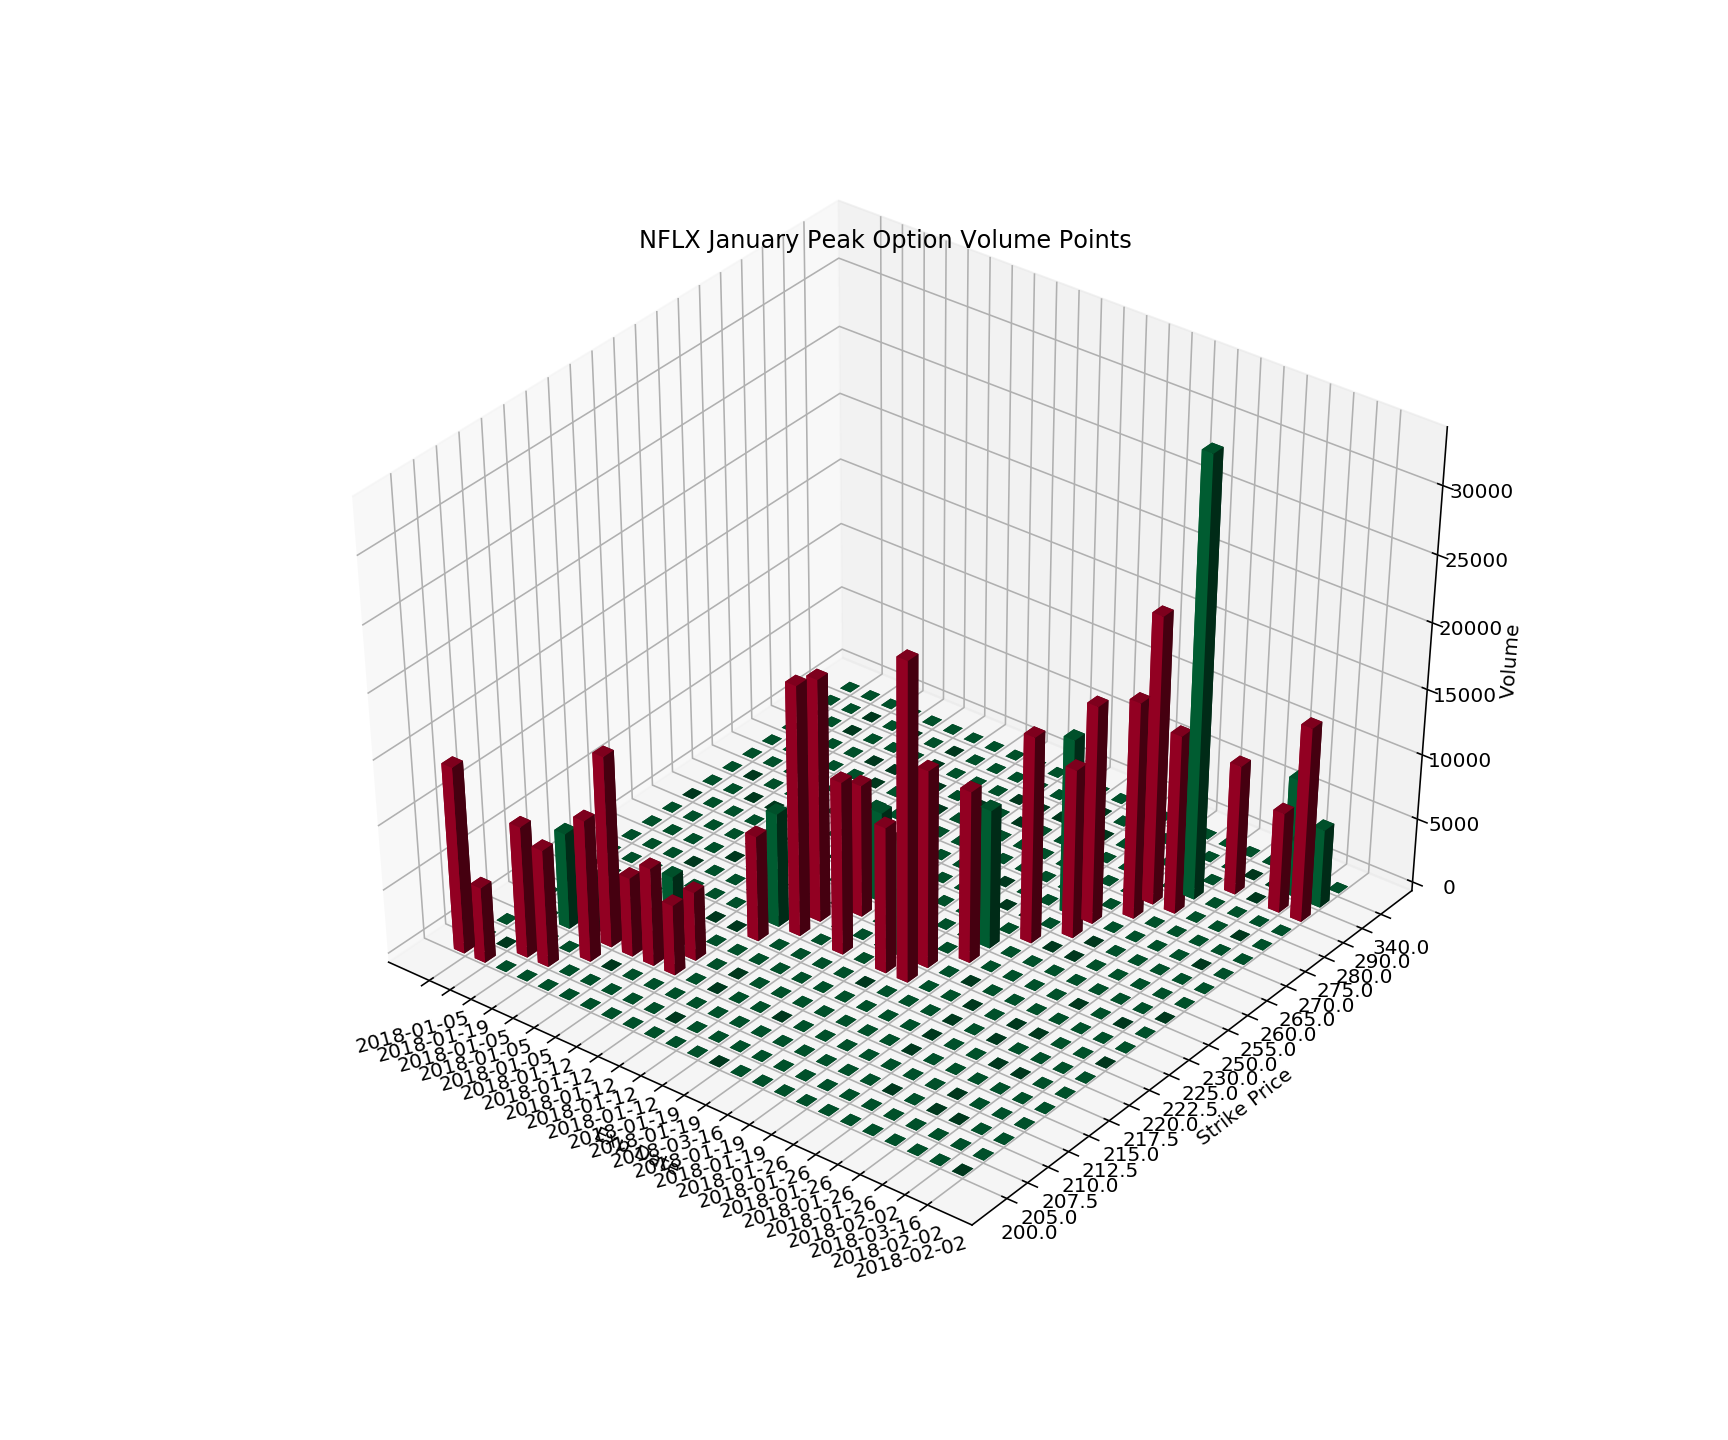

In [38]:
def barplotting(dataFrame):
    %matplotlib notebook
#     Prep simplified dataframe and format it to be plottable

    dataFrame["Merge Date"] = "Date " + dataFrame["Data Date"] + " Exp " + dataFrame["Exp Date"]
    arrays = [dataFrame.loc[:, "Merge Date"],dataFrame.loc[:, "Strike Price"]]
    tuples = list(zip(*arrays))
    index = pd.MultiIndex.from_tuples(tuples, names=['Merge Date', 'Strike Price'])  
    vol = dataFrame.loc[:, "Volume"].to_numpy()

#     df_multi_index = dataFrame.set_index(['Merge Date', 'Strike Price'], append=True)
    df_multi_index = pd.DataFrame({"Volume": vol}, index=index)
#     print(df_multi_index.shape)
#     print(np.where(df_multi_index.index.duplicated()))
#     print(df_multi_index.iloc[3])
#     print(df_multi_index)
#     print(df_multi_index.shape)
#     print(df)
#     print(df_multi_index.unstack().fillna(0).stack())
    df = df_multi_index.unstack().fillna(0).stack()
#     print(df)
    # Set up z
    L = []
    for i, group in df.groupby(level=1)['Volume']:
        L.append(group.values)
    z = np.hstack(L).ravel()
#     print("z", z)
    
    # Getting color?
    # Got Color!
    succ = dataFrame.loc[:, "Success"].to_numpy()
    df_color = pd.DataFrame({"Success": succ}, index=index)
    df_color_test = df_color.unstack().fillna(0).stack()
    
    C = []
    for i, group in df_color_test.groupby(level=1)['Success']:
        C.append(group.values)
    colr = np.hstack(C).ravel()

    colors = plt.cm.RdYlGn_r(colr.flatten()/float(colr.max()))
    
    # Set up labels, x, and y
    xlabels = df.index.get_level_values('Merge Date').unique()
#     print(xlabels)
    ylabels = df.index.get_level_values('Strike Price').unique()
#     print(xlabels.shape[0], ylabels.shape[0])
    x = np.arange(xlabels.shape[0])
    y = np.arange(ylabels.shape[0])
#     print("labels" , y.shape, x.shape)

    # Set up meshgrid (matrix) for plotting
    x_M, y_M = np.meshgrid(x, y, copy=False)
#     print((x_M))

    # Plotting code
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')
    # ax = Axes3D(fig)

    # Making the intervals in the axes match with their respective entries
    ax.w_xaxis.set_ticks(x + 0.5/2.)
    ax.w_yaxis.set_ticks(y + 0.5/2.)
    xlabels = [i for i in xlabels]
#     ylabels = [i for i in ylabels]
    new_xlabels = []
    for x in xlabels:
        new_xlabels.append(x[-10:])
    
#     new_ylabels = []
#     for y in ylabels:
#         new_ylabels.append(y[-10:])
#     new_xlabels = [x[-10:] for x in xlabels]
#     new_ylabels = [y[-10:] for y in ylabels]
    # Renaming the ticks as they were before
    ax.w_xaxis.set_ticklabels(new_xlabels, rotation=15)
    ax.w_yaxis.set_ticklabels(ylabels)
#     print(xlabels)

    # Labeling the 3 dimensions
    ax.set_xlabel('Exp Date')
    ax.set_ylabel('Strike Price')
    ax.set_zlabel('Volume')
    ax.set_title("NFLX January Peak Option Volume Points")
#     ax.set_xlim3d(2,4.5)
    

    # Choosing the range of values to be extended in the set colormap
    # values = np.linspace(0.2, 1., x_M.ravel().shape[0])

    # Selecting an appropriate colormap
    # colors = plt.cm.Spectral(values)

    ax.bar3d(x_M.ravel(), y_M.ravel(), z*0, dx=0.5, dy=0.5, dz=z, color=colors)  #color=colors
#     ax.margins(x = 0, y=-.4, z=0)
#     ax.set_zlim(20, 40)
    plt.show()
 
barplotting(nflx_Jan_daily)

In [65]:
def barplotting(dataFrame, graph):
    %matplotlib notebook
    # Prep simplified dataframe and format it to be plottable
    arrays = [dataFrame.loc[:, "Exp Date"],dataFrame.loc[:, "Strike Price"]]
    print(arrays)
    tuples = list(zip(*arrays))
    print(tuples)
    index = pd.MultiIndex.from_tuples(tuples, names=['Exp Date', 'Strike Price'])  
    print(index)
    vol = dataFrame.loc[:, "Volume"].to_numpy()
    print(vol)

    df = pd.DataFrame({"Volume": vol}, index=index)
#     print(df_multi_index)

#     df = df_multi_index.unstack().fillna(0).stack()
    print(df)
    print("fail")
    # Set up z
    L = []
    for i, group in df.groupby(level=1)['Volume']:
        L.append(group.values)
    z = np.hstack(L).ravel()
    print(z)
#     z.shape

#     # Set up labels, x, and y
#     xlabels = df.index.get_level_values('Exp Date').unique()
#     ylabels = df.index.get_level_values('Strike Price').unique()
#     print(xlabels.shape[0])
#     x = np.arange(xlabels.shape[0])
#     y = np.arange(ylabels.shape[0])
#     print(y)

#     # Set up meshgrid (matrix) for plotting
#     x_M, y_M = np.meshgrid(x, y, copy=False)
#     x_M.shape, y_M.shape

5
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


<IPython.core.display.Javascript object>


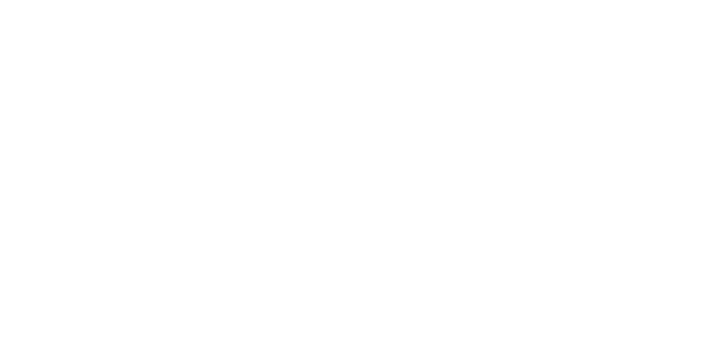

ValueError: shape mismatch: objects cannot be broadcast to a single shape

In [68]:
barplotting(tsla_succ_Jan_daily, 111)

In [47]:
z = tsla_succ_Jan_daily.loc[:, "Volume"].ravel()
z

array([ 2353,  2334,  1755,  3069,  3007,  2294, 20990, 13345,  6900,
       19227, 10688,  8786, 13851, 11804,  6465,  5277, 10223,  9338,
        7257,  6662,  6295, 16504, 13410,  8434, 18130, 15720, 13123,
        9061,  9988,  9778,  6771,  9004, 14549, 14499, 10571,  6683,
       25403, 12945, 12150,  7030,  6692,  4956,  8057,  7323,  4234,
        7925,  7268,  8759, 11631,  8678,  6439, 13752, 13011, 10823,
       10240,  5705,  5046,  4507,  3998,  3524,  7884,  8325,  7307])

<IPython.core.display.Javascript object>


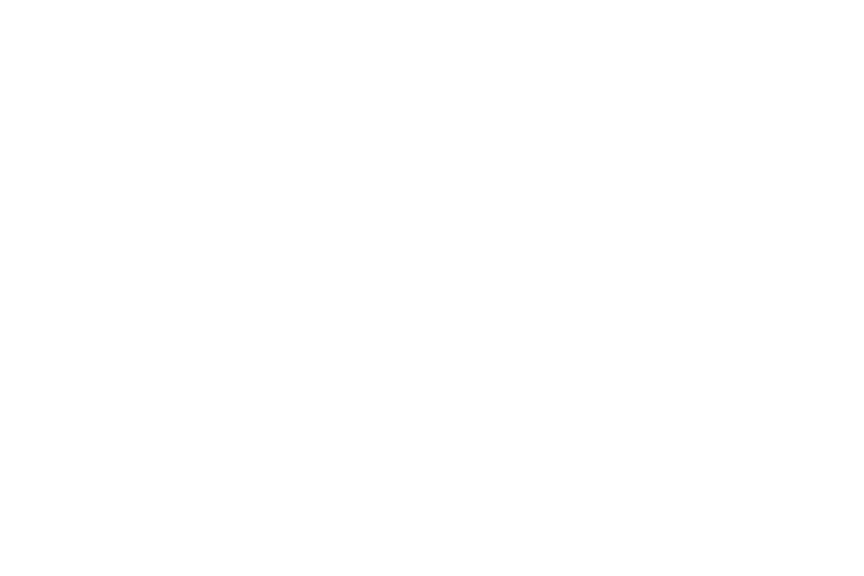

TypeError: can only concatenate str (not "int") to str

In [97]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x_data, y_data = tsla_succ_Jan_daily["Exp Date"], tsla_succ_Jan_daily["Strike Price"]
# The following call boils down to picking
# one entry from each array and plotting a bar to from
# (x_data[i], y_data[i], 0) to (x_data[i], y_data[i], z_data[i]).
z_data = tsla_succ_Jan_daily["Volume"]
# print(type(x_data, y_data, z_data))
ax.bar3d( x_data, y_data, z_data*0, 1, 1, z_data )